# Data Description

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()
print('LOAD DURATION: ', dt.datetime.now() - start_time)

LOAD DURATION:  0:00:00.000035


In [2]:
%%time
data = pd.read_csv('NY property data.csv')

CPU times: user 1.18 s, sys: 170 ms, total: 1.35 s
Wall time: 1.39 s


In [3]:
data.dropna(how='all', axis=1, inplace=True) # drop any empty columns
print('data.shape=',data.shape)
print(data.info())
data.head().transpose()

data.shape= (1070994, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 32 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   RECORD    1070994 non-null  int64  
 1   BBLE      1070994 non-null  object 
 2   BORO      1070994 non-null  int64  
 3   BLOCK     1070994 non-null  int64  
 4   LOT       1070994 non-null  int64  
 5   EASEMENT  4636 non-null     object 
 6   OWNER     1039249 non-null  object 
 7   BLDGCL    1070994 non-null  object 
 8   TAXCLASS  1070994 non-null  object 
 9   LTFRONT   1070994 non-null  int64  
 10  LTDEPTH   1070994 non-null  int64  
 11  EXT       354305 non-null   object 
 12  STORIES   1014730 non-null  float64
 13  FULLVAL   1070994 non-null  float64
 14  AVLAND    1070994 non-null  float64
 15  AVTOT     1070994 non-null  float64
 16  EXLAND    1070994 non-null  float64
 17  EXTOT     1070994 non-null  float64
 18  EXCD1     638488 non-null   float64


,0,1,2,3,4
RECORD,1,2,3,4,5
BBLE,1000010101,1000010201,1000020001,1000020023,1000030001
BORO,1,1,1,1,1
BLOCK,1,1,2,2,3
LOT,101,201,1,23,1
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,DEPT OF GENERAL SERVI,DEPARTMENT OF BUSINES,PARKS AND RECREATION
BLDGCL,P7,Z9,Y7,T2,Q1
TAXCLASS,4,4,4,4,4
LTFRONT,500,27,709,793,323


In [4]:
data.tail().transpose()

,1070989,1070990,1070991,1070992,1070993
RECORD,1070990,1070991,1070992,1070993,1070994
BBLE,5080500083,5080500086,5080500089,5080500092,5080500094
BORO,5,5,5,5,5
BLOCK,8050,8050,8050,8050,8050
LOT,83,86,89,92,94
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,"TOBIN, GALE",SHERRI MILINAZZO,JOHN GERVASI,RITA M MOOG,EDWARD DONOHUE
BLDGCL,A1,A1,A1,A1,A1
TAXCLASS,1,1,1,1,1
LTFRONT,60,62,53,52,50


In [5]:
data.shape

(1070994, 32)

In [6]:
# add a dummy categorical column for the case the fields all look numeric
data['dummy'] = 'temp'

In [7]:
df_stats = pd.DataFrame(data.count(),columns=['count'])
df_stats['isna'] = data.isna().sum()
df_stats['% pop'] = 1 - data.isna().sum()/len(data)
df_stats

,count,isna,% pop
RECORD,1070994,0,1.000000
BBLE,1070994,0,1.000000
BORO,1070994,0,1.000000
BLOCK,1070994,0,1.000000
LOT,1070994,0,1.000000
EASEMENT,4636,1066358,0.004329
OWNER,1039249,31745,0.970359
BLDGCL,1070994,0,1.000000
TAXCLASS,1070994,0,1.000000
LTFRONT,1070994,0,1.000000


In [8]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RECORD,1070994.0,NaN,NaN,NaN,535497.5,309169.481439,1.0,267749.25,535497.5,803245.75,1070994.0
BBLE,1070994,1070994,1000010101,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BORO,1070994.0,NaN,NaN,NaN,3.215427,1.201197,1.0,3.0,3.0,4.0,5.0
BLOCK,1070994.0,NaN,NaN,NaN,4757.239213,3676.579035,1.0,1555.0,4047.0,6898.0,16350.0
LOT,1070994.0,NaN,NaN,NaN,364.722117,853.215243,1.0,23.0,49.0,143.0,9978.0
EASEMENT,4636,12,E,4148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OWNER,1039249,863347,PARKCHESTER PRESERVAT,6021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLDGCL,1070994,200,R4,139879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAXCLASS,1070994,11,1,660721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LTFRONT,1070994.0,NaN,NaN,NaN,36.635301,74.032839,0.0,19.0,25.0,40.0,9999.0


### Make best guess to automatically set numerics or categoricals

In [9]:
df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()

for col in data.columns:
    numunique = data[col].nunique()
    if numunique == len(data) or numunique <=6: # you can adjust this upper limit for your data set
            print(col)
            if col in numerics:
                numerics.remove(col)
                categoricals.extend([col])

# manually switch some fields if desired.          
switch_num2cat = ['BLOCK','LOT','EXCD1','ZIP','EXCD2']
switch_cat2num = []
numerics = [s for s in numerics if s not in switch_num2cat]
categoricals = [s for s in categoricals if s not in switch_cat2num]
numerics.extend(switch_cat2num)
categoricals.extend(switch_num2cat)
categoricals.remove('dummy')
            
print('numerics:',numerics)     
print('\ncategoricals:',categoricals)  

RECORD
BBLE
BORO
EXT
PERIOD
YEAR
VALTYPE
dummy
numerics: ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']

categoricals: ['BBLE', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 'STADDR', 'EXMPTCL', 'PERIOD', 'YEAR', 'VALTYPE', 'RECORD', 'BORO', 'BLOCK', 'LOT', 'EXCD1', 'ZIP', 'EXCD2']


In [10]:
# fix the order of the categoricals
categoricals = ['RECORD','BBLE','BORO','BLOCK','LOT','EASEMENT','OWNER','BLDGCL','TAXCLASS','EXT',
            'EXCD1','STADDR','ZIP','EXMPTCL','EXCD2','PERIOD','YEAR','VALTYPE']

In [11]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [12]:
pd.options.display.float_format = '{:.2f}'.format
statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common
0,LTFRONT,numeric,1070994,100.0%,169108,0.00,9999.00,36.64,74.03,0.00
1,LTDEPTH,numeric,1070994,100.0%,170128,0.00,9999.00,88.86,76.40,100.00
2,STORIES,numeric,1014730,94.7%,0,1.00,119.00,5.01,8.37,2.00
3,FULLVAL,numeric,1070994,100.0%,13007,0.00,6150000000.00,874264.51,11582425.58,0.00
4,AVLAND,numeric,1070994,100.0%,13009,0.00,2668500000.00,85067.92,4057258.16,0.00
5,AVTOT,numeric,1070994,100.0%,13007,0.00,4668308947.00,227238.17,6877526.09,0.00
6,EXLAND,numeric,1070994,100.0%,491699,0.00,2668500000.00,36423.89,3981573.93,0.00
7,EXTOT,numeric,1070994,100.0%,432572,0.00,4668308947.00,91186.98,6508399.78,0.00
8,BLDFRONT,numeric,1070994,100.0%,228815,0.00,7575.00,23.04,35.58,0.00
9,BLDDEPTH,numeric,1070994,100.0%,228853,0.00,9393.00,39.92,42.71,0.00


In [13]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_dfcat = pd.DataFrame(statistics_of_data, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_dfcat.to_excel('categoricals table.xlsx',index=False)
stats_dfcat

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,RECORD,categorical,1070994,100.0%,0,1070994,1
1,BBLE,categorical,1070994,100.0%,0,1070994,1000010101
2,BORO,categorical,1070994,100.0%,0,5,4
3,BLOCK,categorical,1070994,100.0%,0,13984,3944
4,LOT,categorical,1070994,100.0%,0,6366,1
5,EASEMENT,categorical,4636,0.4%,0,12,E
6,OWNER,categorical,1039249,97.0%,0,863347,PARKCHESTER PRESERVAT
7,BLDGCL,categorical,1070994,100.0%,0,200,R4
8,TAXCLASS,categorical,1070994,100.0%,0,11,1
9,EXT,categorical,354305,33.1%,0,3,G


# Examine/visualize each field

In [14]:
numrecords = len(data)

## RECORD

In [15]:
plt.rcParams.update({'figure.figsize':(14,6)})
plt.rcParams.update({'font.size':20})
# plt.rcParams['font.family'] = 'Times New Roman'

In [16]:
len(data['RECORD'].unique())

1070994

In [17]:
len(data['RECORD'])

1070994

<Axes: xlabel='RECORD'>

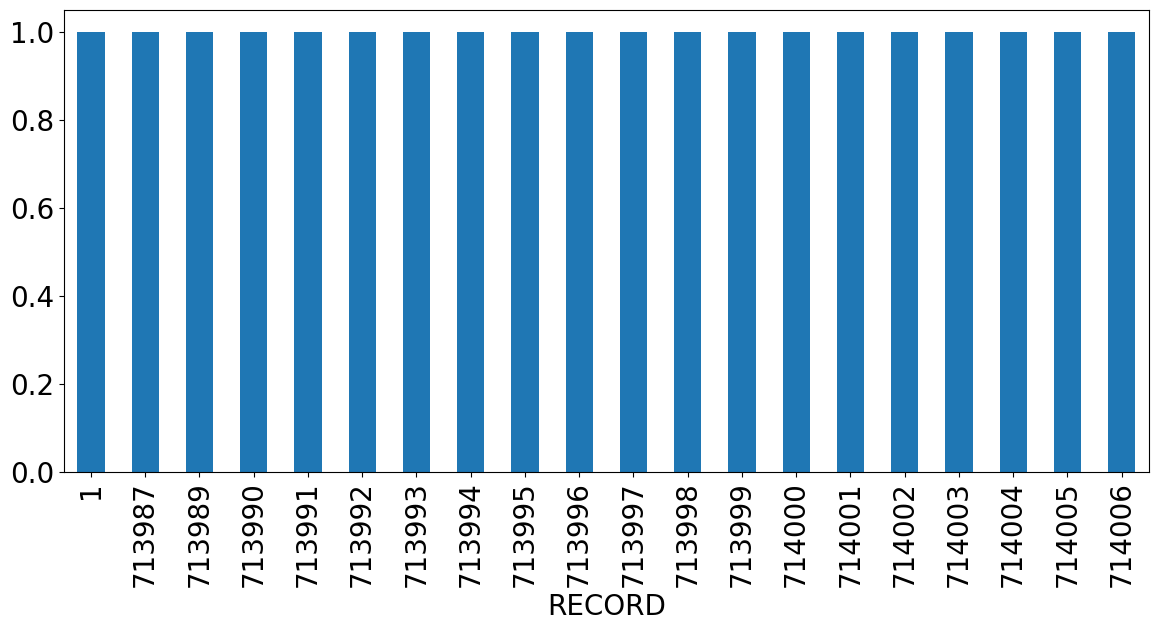

In [18]:
data['RECORD'].value_counts().head(20).plot(kind='bar')

## BBLE

In [19]:
len(data['BBLE'])

1070994

In [20]:
len(data['BBLE'].unique())

1070994

In [177]:
data.head(20)

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,dummy
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR,temp
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR,temp
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR,temp
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR,temp
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR,temp
5,6,1000030002,1,3,2,NaN,PARKS AND RECREATION,Q1,4,496,...,0,4268700.00,4268700.00,4268700.00,4268700.00,NaN,FINAL,2010/11,AC-TR,temp
6,7,1000030003,1,3,3,NaN,PARKS AND RECREATION,Q1,4,180,...,19,3546900.00,3546900.00,3546900.00,3546900.00,NaN,FINAL,2010/11,AC-TR,temp
7,8,1000030010,1,3,10,NaN,DEPT RE-CITY OF NY,Z9,4,362,...,227,9882000.00,11304000.00,9882000.00,11304000.00,NaN,FINAL,2010/11,AC-TR,temp
8,9,1000041001,1,4,1001,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,636093.00,2049290.00,NaN,NaN,NaN,FINAL,2010/11,AC-TR,temp
9,10,1000041002,1,4,1002,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,919276.00,2961617.00,NaN,NaN,NaN,FINAL,2010/11,AC-TR,temp


<Axes: xlabel='BBLE'>

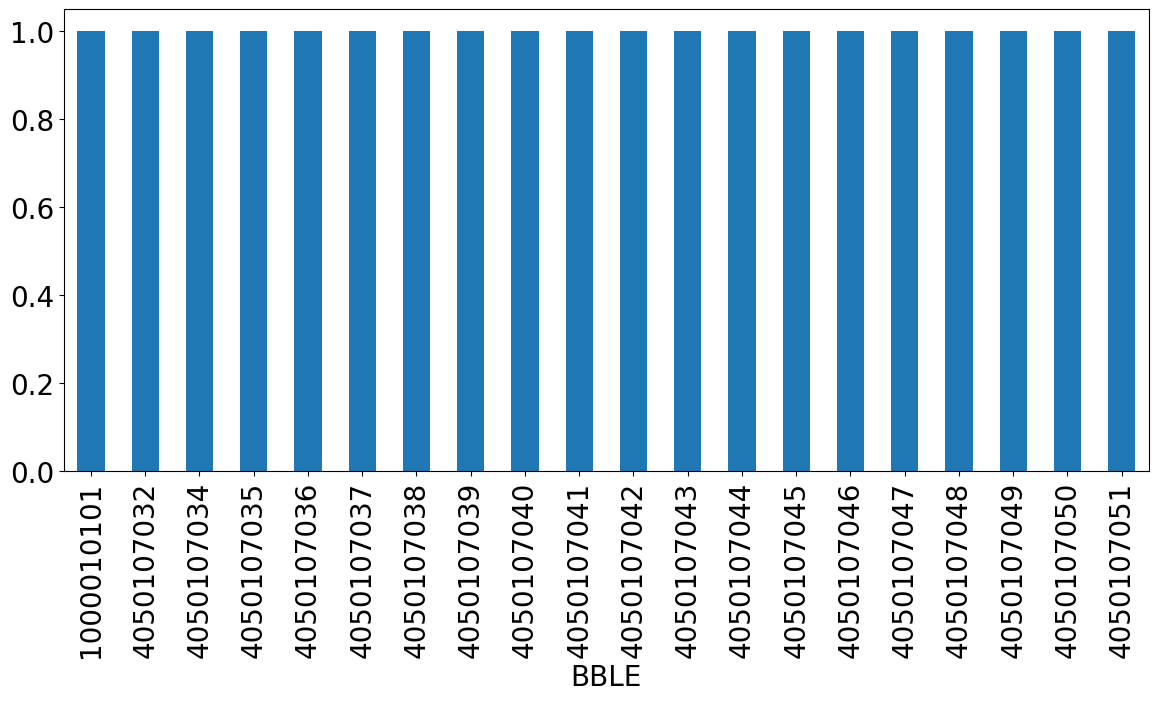

In [21]:
data['BBLE'].value_counts().head(20).plot(kind='bar')

## BORO

In [22]:
len(data['BORO'].unique())

5

In [23]:
data['BORO'].count() * 100 / numrecords

100.0

In [24]:
data['BORO'].value_counts()

BORO
4    358046
3    323243
1    146220
5    136200
2    107285
Name: count, dtype: int64

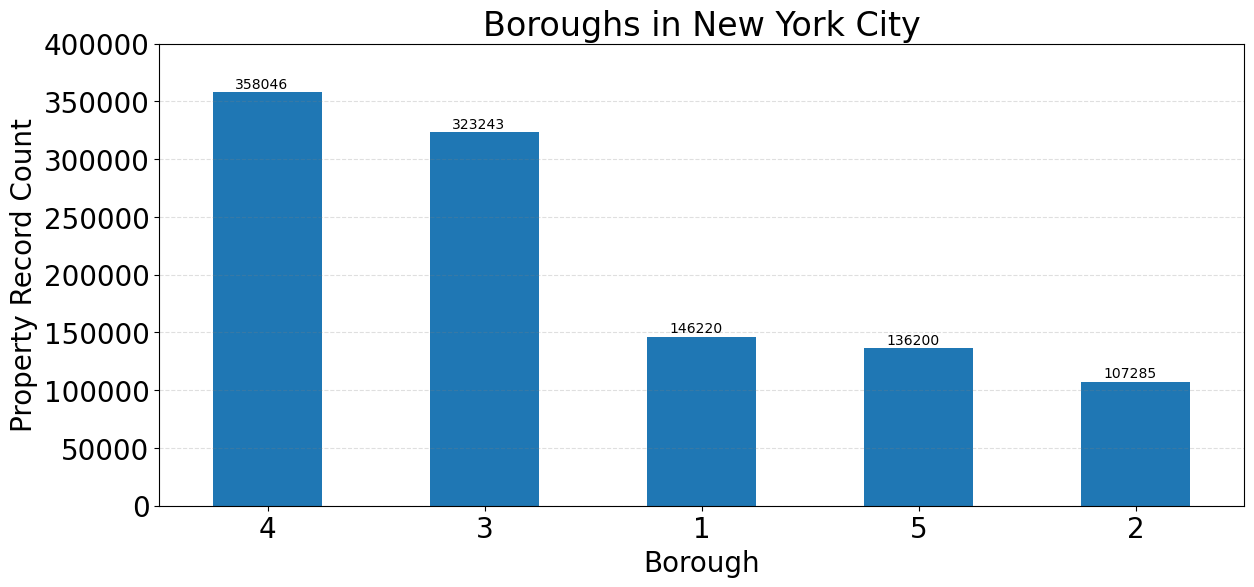

In [195]:
# Generate the bar plot
counts = data['BORO'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylim(0,400000)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=10)

plt.title('Boroughs in New York City')
plt.xlabel('Borough')
plt.ylabel('Property Record Count')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('BORO')

/var/folders/lj/vjjcnvz53rq6gytkbpl_lsvr0000gn/T/ipykernel_20938/3038125244.py:4: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,400000)


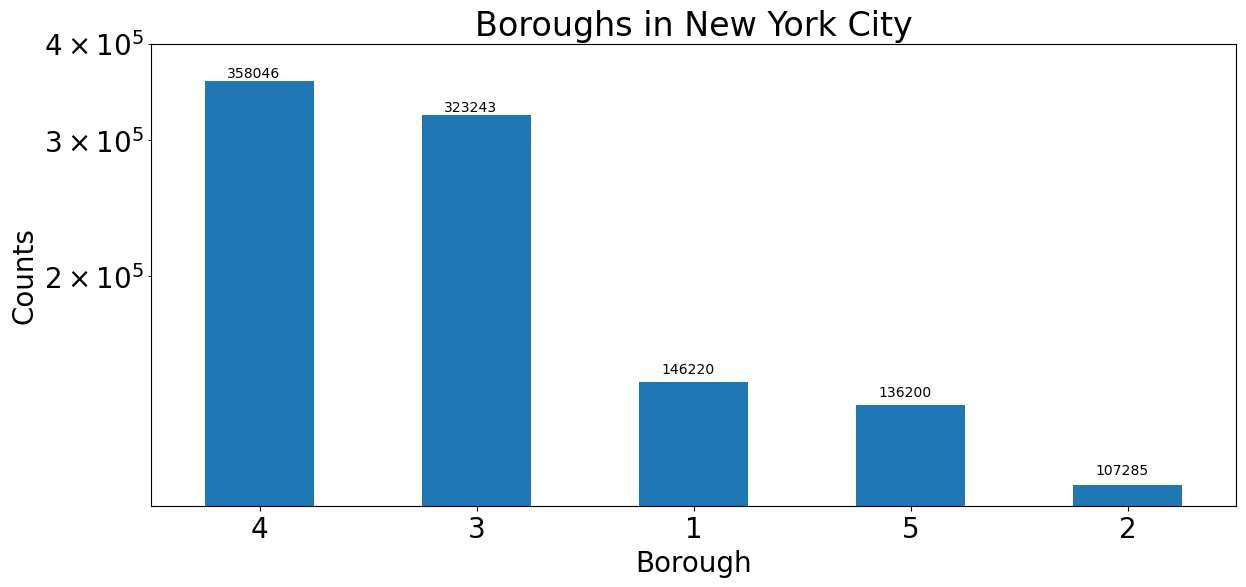

In [186]:

counts = data['BORO'].value_counts().head(20)
ax = counts.plot(kind='bar',logy=True)
plt.xticks(rotation=0)
plt.ylim(0,400000)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=10)

plt.title('Boroughs in New York City')
plt.xlabel('Borough')
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

## BLOCK

In [26]:
len(data['BLOCK'].unique())

13984

In [27]:
data['BLOCK'].count() * 100 / numrecords

100.0

In [28]:
data['BLOCK'].value_counts()

BLOCK
3944     3888
16       3786
3943     3424
3938     2794
1171     2535
         ... 
9682        1
12325       1
10154       1
16129       1
2052        1
Name: count, Length: 13984, dtype: int64

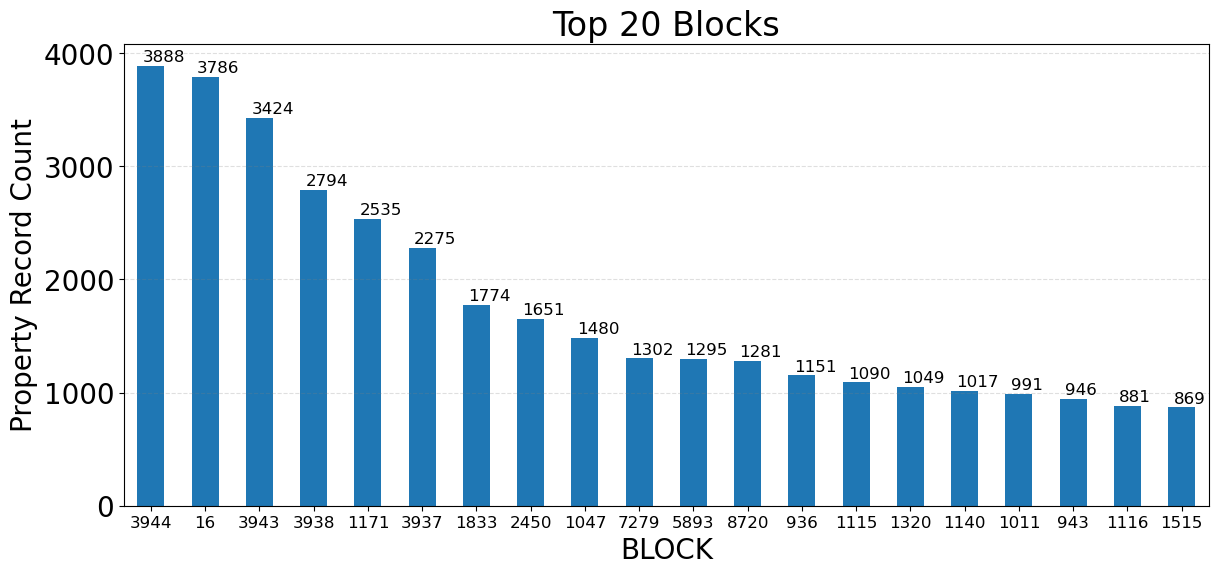

In [194]:
counts = data['BLOCK'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.tick_params(axis='x', labelsize=12)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black',  fontsize=12)

# Set titles for the graph and axes
plt.title('Top 20 Blocks')
plt.ylabel('Property Record Count')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('BLOCK')

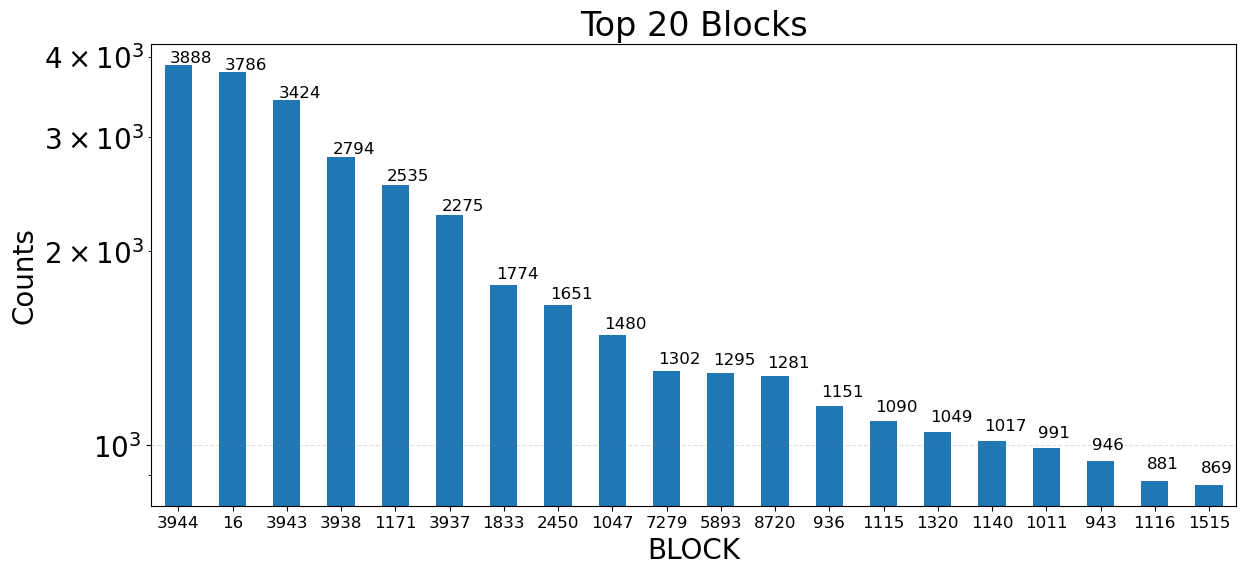

In [189]:
counts = data['BLOCK'].value_counts().head(20)
ax = counts.plot(kind='bar', logy=True)
plt.xticks(rotation=0)
plt.tick_params(axis='x', labelsize=12)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black',  fontsize=12)

# Set titles for the graph and axes
plt.title('Top 20 Blocks')
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('BLOCK')

## LOT

In [30]:
len(data['LOT'].unique())

6366

In [31]:
data['LOT'].count() * 100 / numrecords

100.0

In [32]:
data['LOT'].value_counts()

LOT
1       24367
20      12294
15      12171
12      12143
14      12074
        ...  
6115        1
6116        1
6117        1
6118        1
779         1
Name: count, Length: 6366, dtype: int64

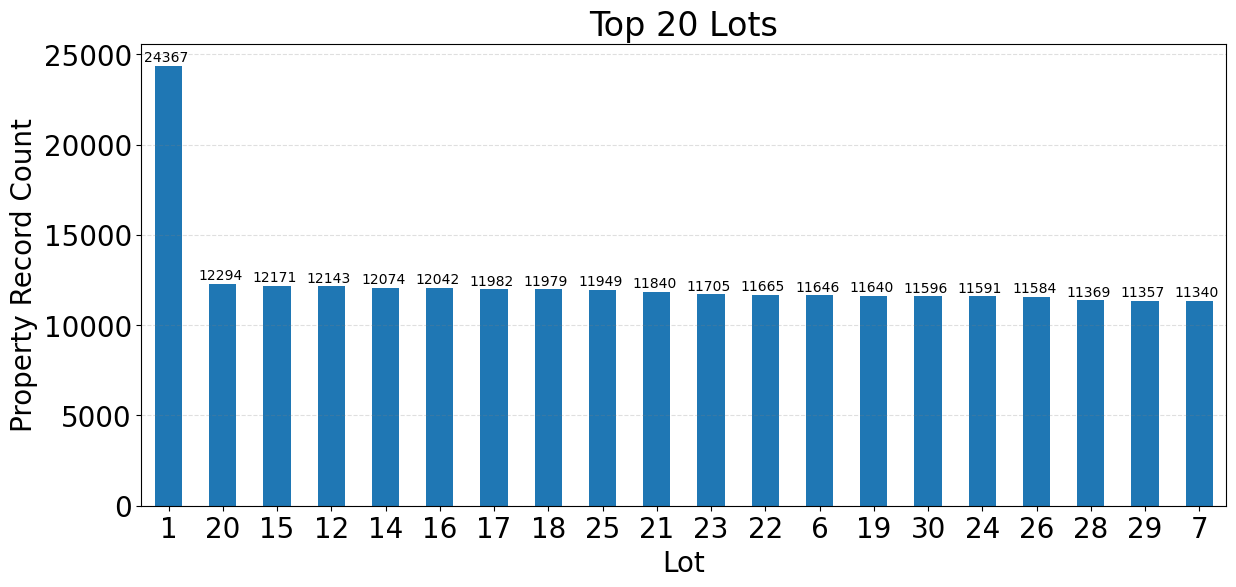

In [193]:
# Generate the bar plot
counts = data['LOT'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)

# Add number labels to each column, shifted to the left
for i, v in enumerate(counts):
    ax.text(i - 0.45, v + counts.max()*0.01, str(v), color='black', fontsize=10)

# Set titles for the graph and axes
plt.title('Top 20 Lots')
plt.xlabel('Lot')
plt.ylabel('Property Record Count')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)


# Save the plot
plt.savefig('LOT')

In [34]:
data['LOT'].max()

9978

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


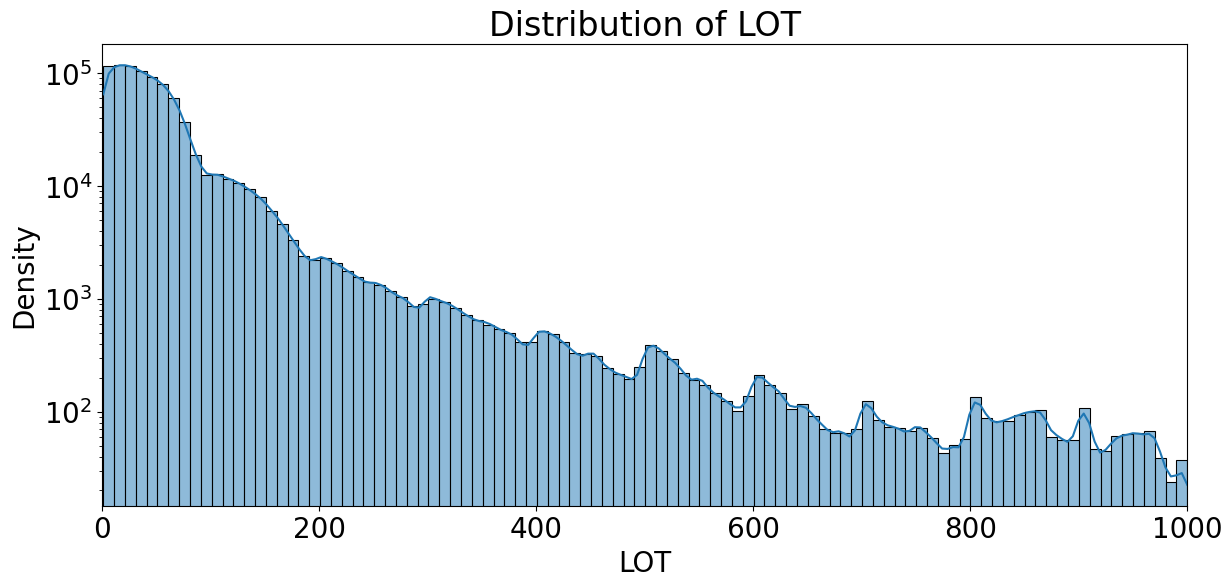

In [35]:
# look at the most relevant range
xhigh = 1000
plt.xlim(0, xhigh)
temp = data[data['LOT'] <= xhigh]
sns.histplot(temp['LOT'],bins = 100, kde = True)

plt.yscale('log')
plt.xlabel('LOT')
plt.ylabel('Density')
plt.title('Distribution of LOT')
plt.show()

# plt.savefig('LOT')

## EASEMENT

In [36]:
len(data['EASEMENT'].unique())

13

In [37]:
data['EASEMENT'].count() * 100 / numrecords

0.4328689049611856

In [38]:
data['EASEMENT'].value_counts()

EASEMENT
E    4148
F     296
G     102
H      33
N      19
I      16
J       8
K       5
L       3
P       3
M       2
U       1
Name: count, dtype: int64

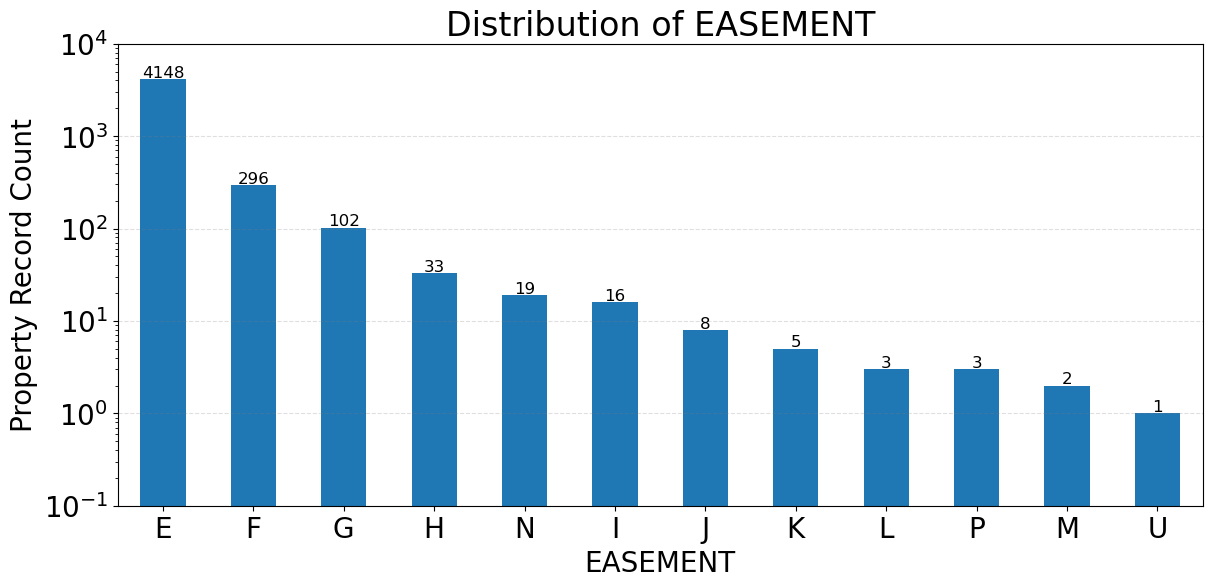

In [196]:
plt.yscale('log')
# Generate the bar plot
counts = data['EASEMENT'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylim(.1,10000)
# Add number labels to each column, shifted to the left
for i, v in enumerate(counts):
    ax.text(i, v*1.05, str(v), color='black', ha='center', fontsize=12)

# Set titles for the graph and axes
plt.title('Distribution of EASEMENT')
plt.xlabel('EASEMENT')
plt.ylabel('Property Record Count')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)


plt.savefig('EASEMENT')

## OWNER

In [40]:
len(data['OWNER'].unique())

863348

In [41]:
data['OWNER'].count() * 100 / numrecords

97.03593110699033

In [42]:
data['OWNER'].value_counts()

OWNER
PARKCHESTER PRESERVAT    6021
PARKS AND RECREATION     4255
DCAS                     2169
HOUSING PRESERVATION     1904
CITY OF NEW YORK         1450
                         ... 
ROSE, LORNA                 1
ELARIO ALTERNO              1
CHARLES,VIRGINIA            1
HAYLES, HEATHER             1
EDWARD DONOHUE              1
Name: count, Length: 863347, dtype: int64

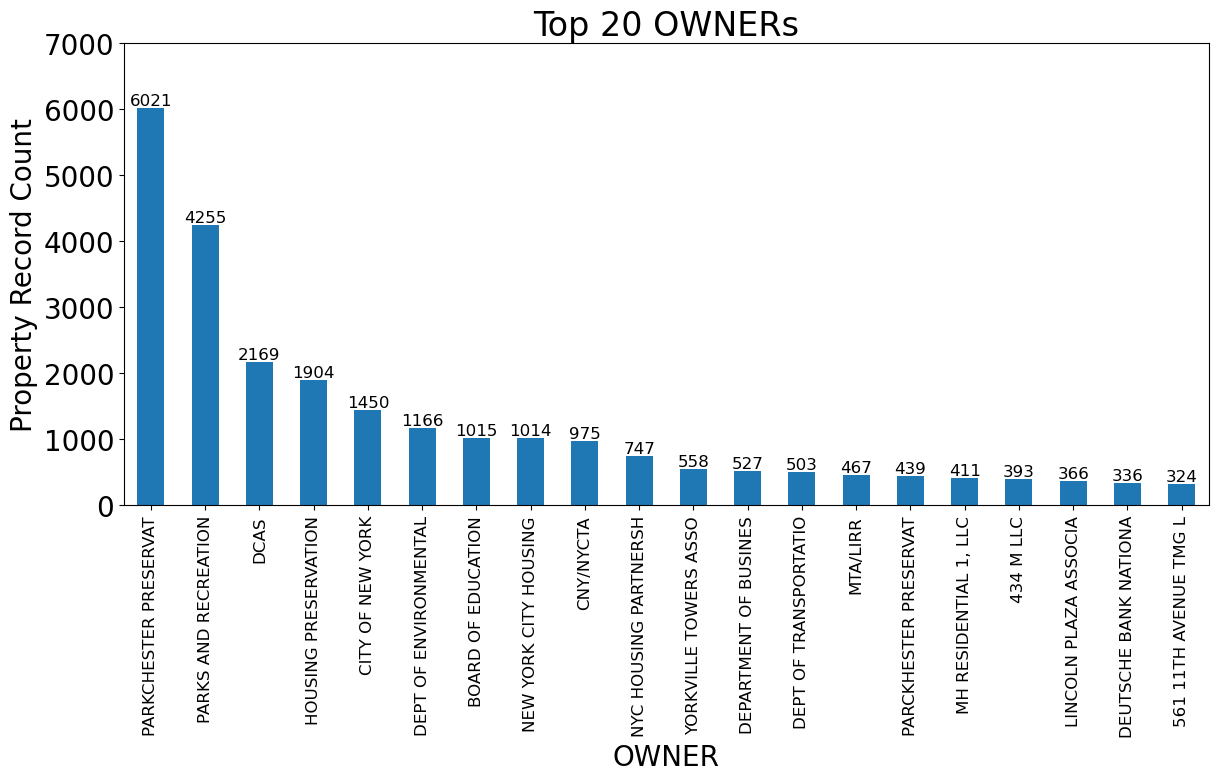

In [200]:
own = data['OWNER'].value_counts().head(20)

data['OWNER'].value_counts().head(20).plot(kind = 'bar')
# plt.yscale('log')
plt.ylim(0,7000)
plt.xticks(fontsize = 12)

j= 0
for i in own.index:    
        plt.text(j, own[i], own[i], ha = "center", va = "bottom", fontsize = 12)
        j = j + 1

plt.xlabel('OWNER')
plt.ylabel('Property Record Count')
plt.title('Top 20 OWNERs')

plt.savefig('OWNER')

/var/folders/lj/vjjcnvz53rq6gytkbpl_lsvr0000gn/T/ipykernel_20938/461019370.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,7000)


Text(0.5, 1.0, 'Top 20 OWNERs')

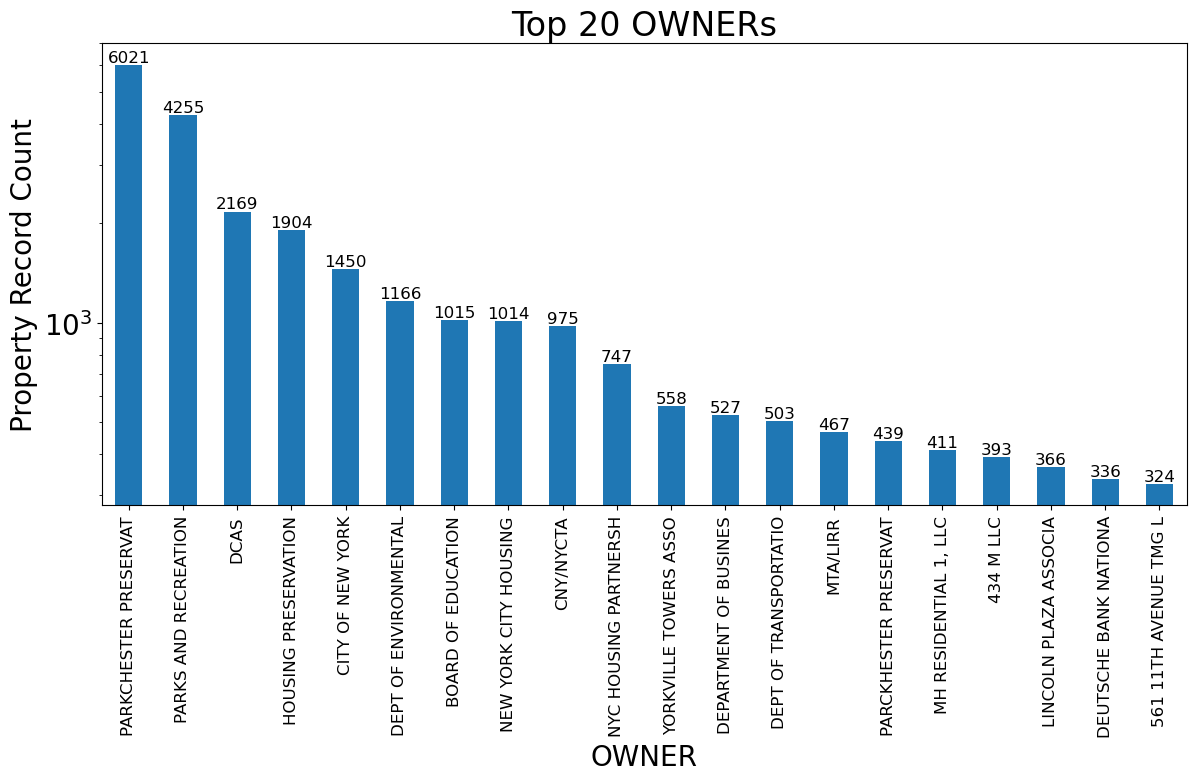

In [201]:
own = data['OWNER'].value_counts().head(20)

data['OWNER'].value_counts().head(20).plot(kind = 'bar', logy = True)
# plt.yscale('log')
plt.ylim(0,7000)
plt.xticks(fontsize = 12)

j= 0
for i in own.index:    
        plt.text(j, own[i], own[i], ha = "center", va = "bottom", fontsize = 12)
        j = j + 1

plt.xlabel('OWNER')
plt.ylabel('Property Record Count')
plt.title('Top 20 OWNERs')

## BLDGCL

In [44]:
len(data['BLDGCL'].unique())

200

In [45]:
data['BLDGCL'].count() * 100 / numrecords

100.0

In [46]:
data['BLDGCL'].value_counts()

BLDGCL
R4    139879
A1    123369
A5     96984
B1     84208
B2     77598
       ...  
I2         4
I3         4
H7         3
E6         1
Y5         1
Name: count, Length: 200, dtype: int64

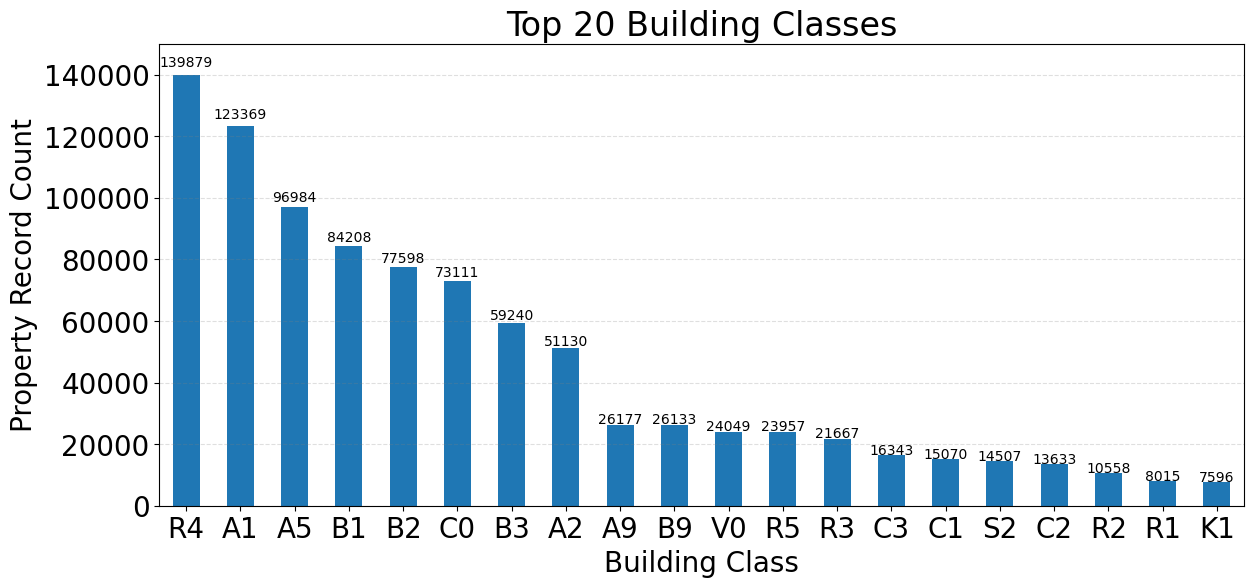

In [204]:
# Generate the bar plot
counts = data['BLDGCL'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylim(0,150000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.02, str(v), color='black', ha='center',fontsize=10)

# Set titles for the graph and axes
plt.title('Top 20 Building Classes')
plt.xlabel('Building Class')
plt.ylabel('Property Record Count', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('BLDGCL')

/var/folders/lj/vjjcnvz53rq6gytkbpl_lsvr0000gn/T/ipykernel_20938/2067461692.py:4: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,150000)


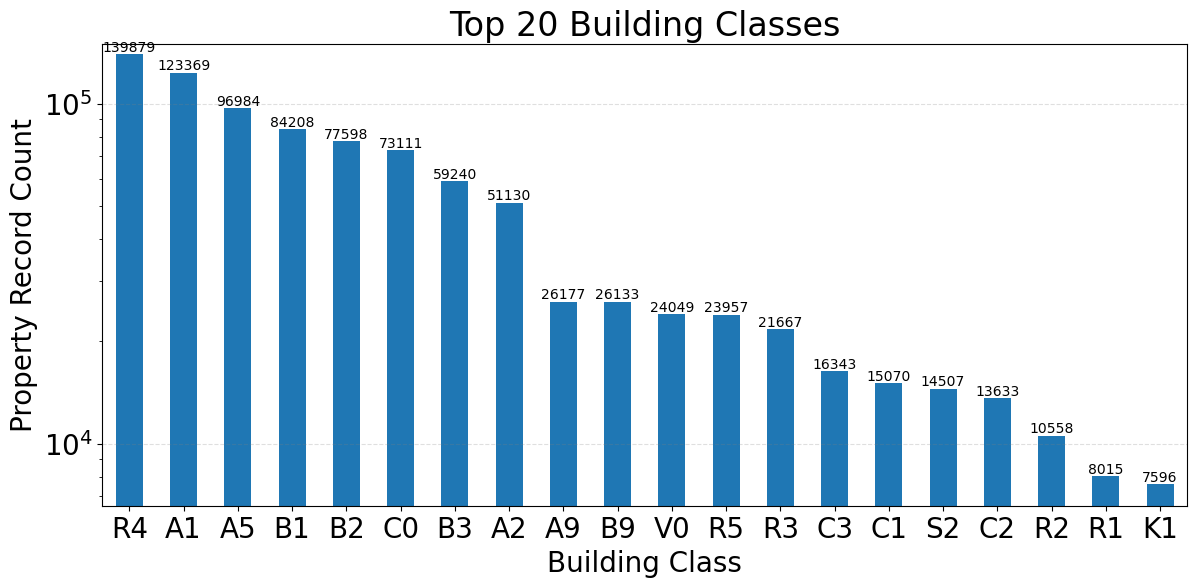

In [205]:
counts = data['BLDGCL'].value_counts().head(20)
ax = counts.plot(kind='bar', logy = True)
plt.xticks(rotation=0)
plt.ylim(0,150000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.02, str(v), color='black', ha='center',fontsize=10)

# Set titles for the graph and axes
plt.title('Top 20 Building Classes')
plt.xlabel('Building Class')
plt.ylabel('Property Record Count', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

## TAXCLASS

In [48]:
len(data['TAXCLASS'].unique())

11

In [49]:
data['TAXCLASS'].count() * 100 / numrecords

100.0

In [50]:
data['TAXCLASS'].value_counts()

TAXCLASS
1     660721
2     188612
4     104310
2A     40574
1B     24738
1A     21667
2B     13964
2C     10795
3       4638
1C       946
1D        29
Name: count, dtype: int64

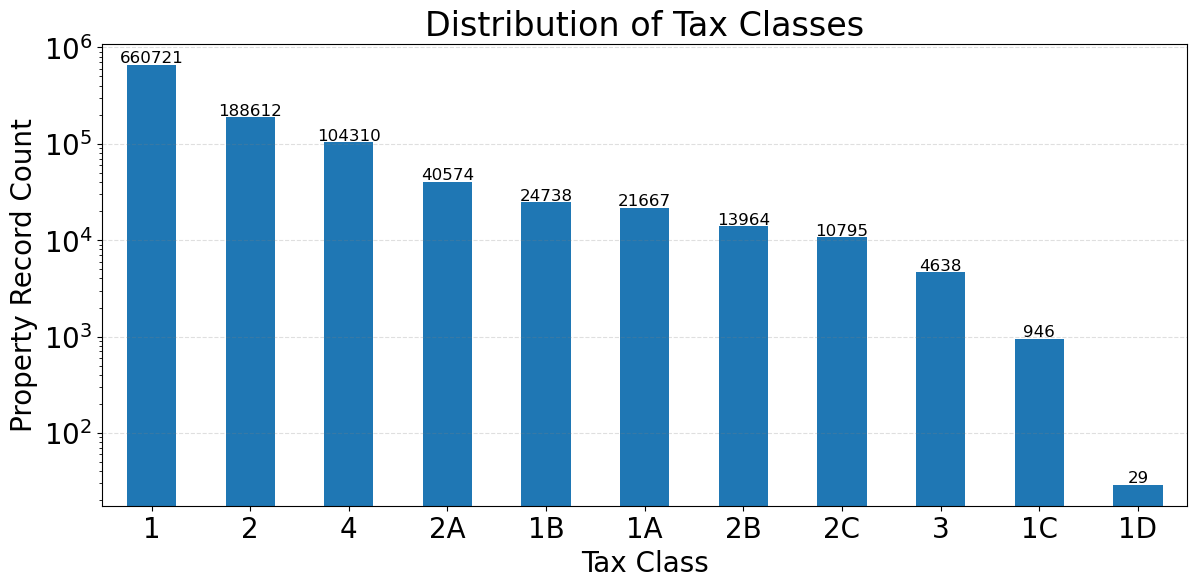

In [206]:
plt.yscale('log')

counts = data['TAXCLASS'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.05, str(v), color='black', ha='center', fontsize=12)

# Set titles for the graph and axes
plt.title('Distribution of Tax Classes')
plt.xlabel('Tax Class')
plt.ylabel('Property Record Count', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)


plt.savefig('TAXCLASS')

## LTFRONT

In [52]:
len(data['LTFRONT'].unique())

1297

In [53]:
data['LTFRONT'].count() * 100 / numrecords

100.0

In [54]:
data['LTFRONT'].value_counts()

LTFRONT
0       169108
20      135178
25      117306
40       85389
18       40668
         ...  
1320         1
1151         1
626          1
1162         1
1201         1
Name: count, Length: 1297, dtype: int64

In [55]:
data['LTFRONT'].max()

9999

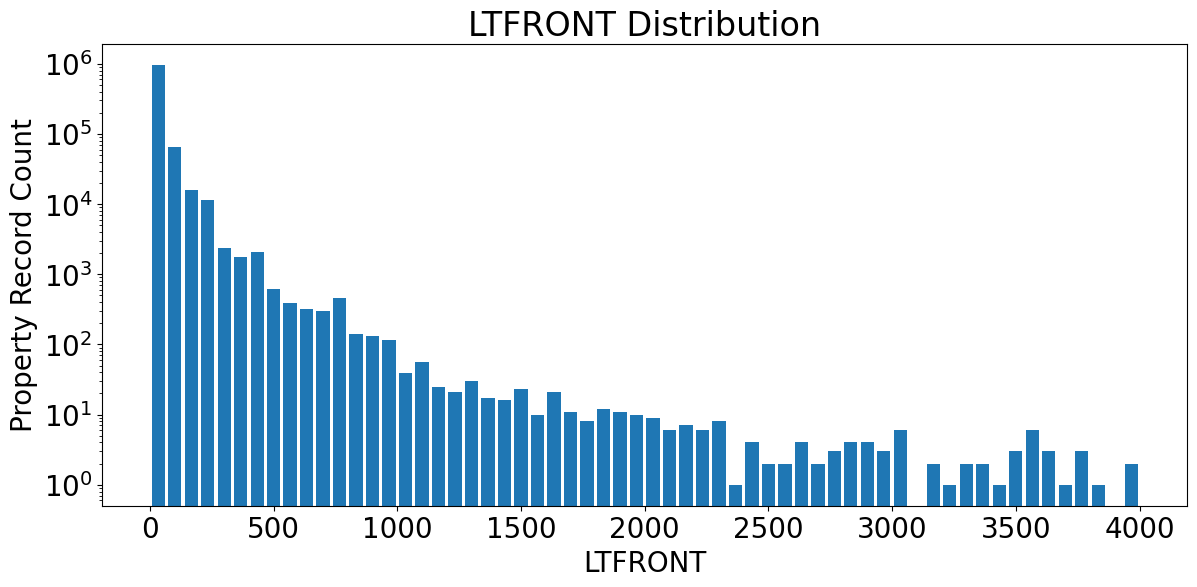

In [207]:
# plotting a histogram
range = (0, 4000)
bins = 60

plt.hist(data['LTFRONT'], bins, range, histtype = 'bar', rwidth = 0.8)

plt.yscale('log')
plt.xlabel('LTFRONT')
plt.ylabel('Property Record Count')
plt.title('LTFRONT Distribution')

plt.savefig('LTFRONT')

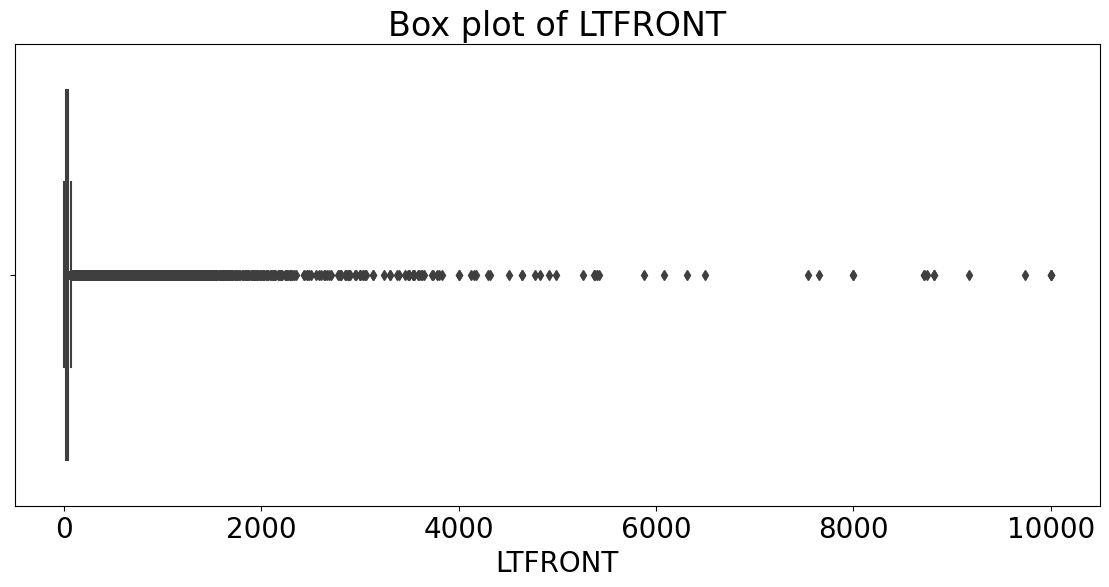

In [57]:
sns.boxplot(x = 'LTFRONT', data = data)

plt.xlabel('LTFRONT')
plt.title('Box plot of LTFRONT')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


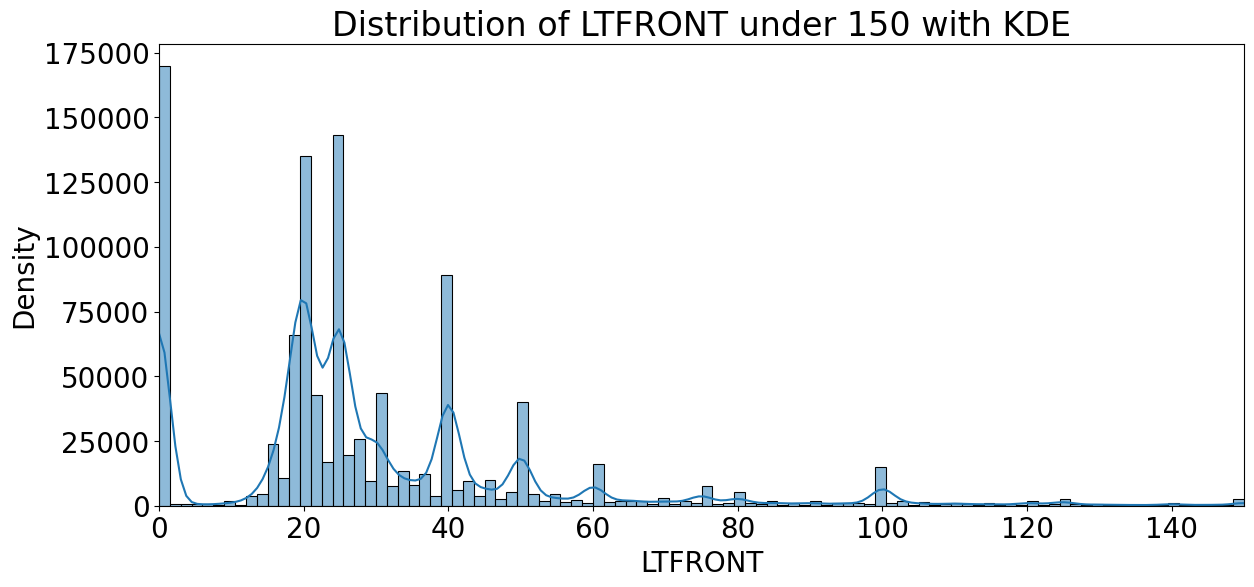

In [213]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['LTFRONT'] <= xhigh]
sns.histplot(temp['LTFRONT'],bins = 100, kde = True)

plt.xlabel('LTFRONT')
plt.ylabel('Density')
plt.title('Distribution of LTFRONT under 150 with KDE')
plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


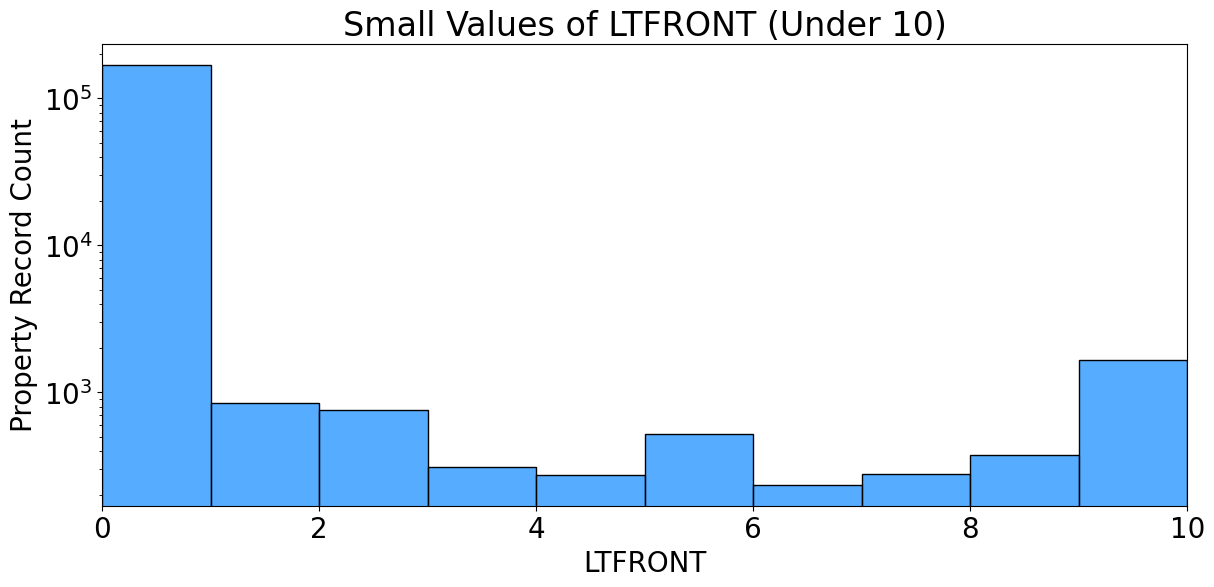

In [210]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0, xhigh)
temp = data[data['LTFRONT'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['LTFRONT'], bins = 10, kde = False, color = 'dodgerblue')
plt.xlabel('LTFRONT')
plt.ylabel('Property Record Count')
plt.title('Small Values of LTFRONT (Under 10)')

plt.savefig('LTFRONT small')

## LTDEPTH

In [60]:
len(data['LTDEPTH'].unique())

1370

In [61]:
data['LTDEPTH'].count() * 100 / numrecords

100.0

In [62]:
data['LTDEPTH'].value_counts()

LTDEPTH
100     464541
0       170128
95       31612
90       20294
80       16671
         ...  
1252         1
1567         1
1305         1
2532         1
1419         1
Name: count, Length: 1370, dtype: int64

In [63]:
data['LTDEPTH'].max()

9999

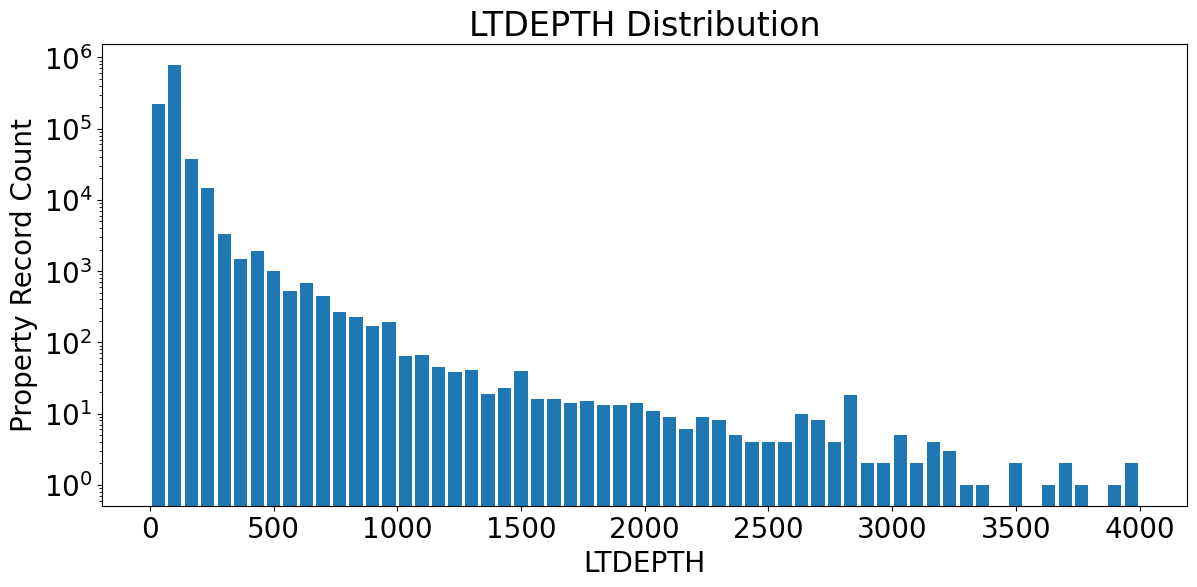

In [211]:
# plotting a histogram
range = (0, 4000)
bins = 60

plt.hist(data['LTDEPTH'], bins, range, histtype = 'bar', rwidth = 0.8)

plt.yscale('log')
plt.xlabel('LTDEPTH')
plt.ylabel('Property Record Count')
plt.title('LTDEPTH Distribution')

plt.savefig('LTDEPTH')

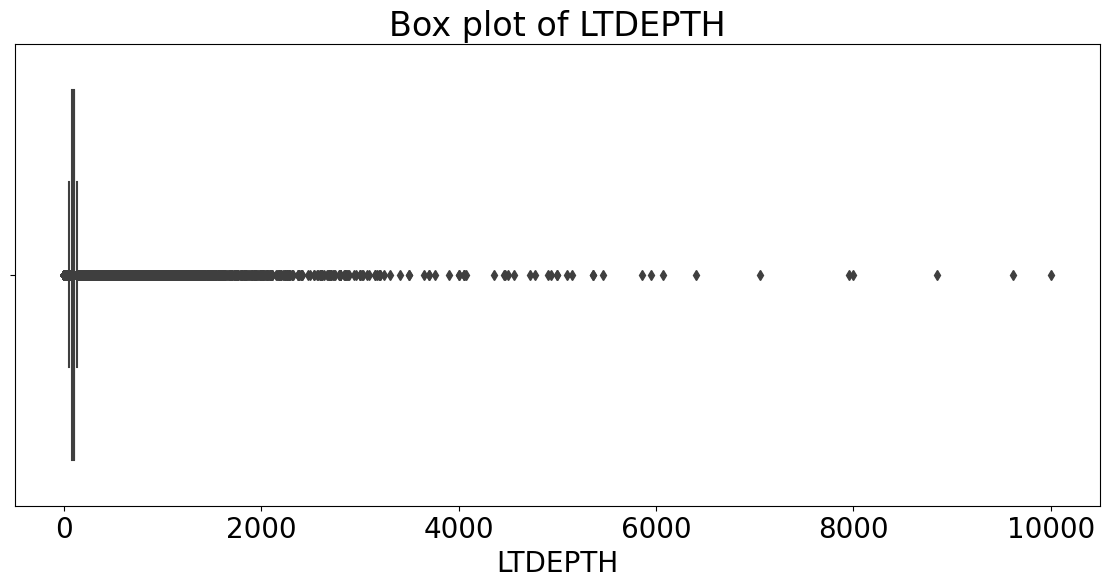

In [65]:
sns.boxplot(x = 'LTDEPTH', data = data)

plt.xlabel('LTDEPTH')
plt.title('Box plot of LTDEPTH')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


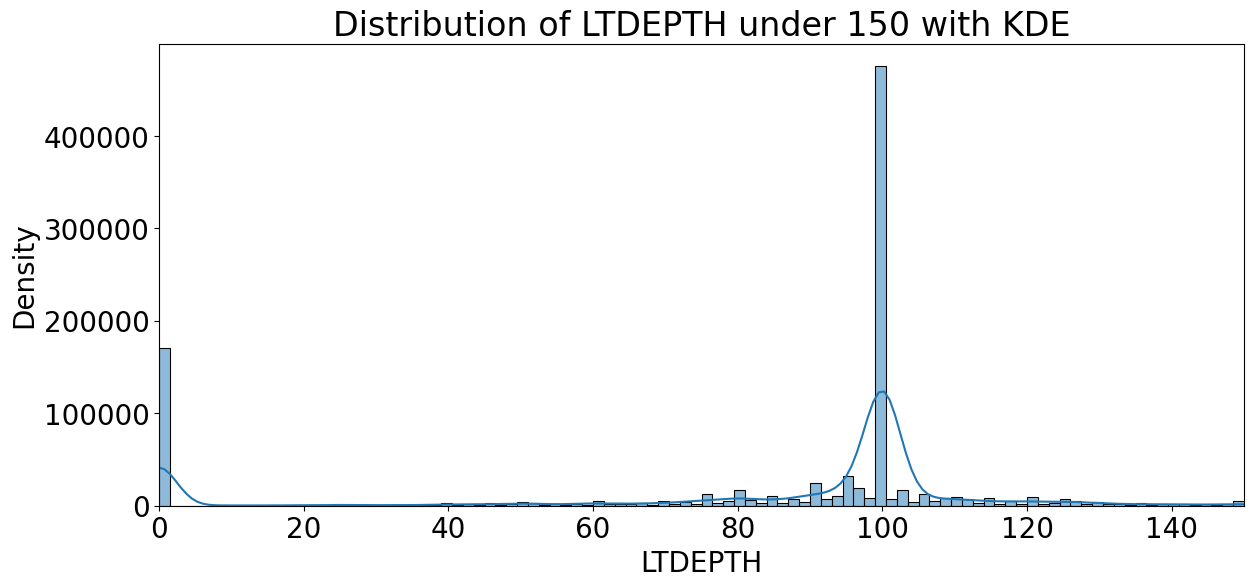

In [212]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
sns.histplot(temp['LTDEPTH'],bins = 100, kde = True)

plt.xlabel('LTDEPTH')
plt.ylabel('Density')
plt.title('Distribution of LTDEPTH under 150 with KDE')
plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


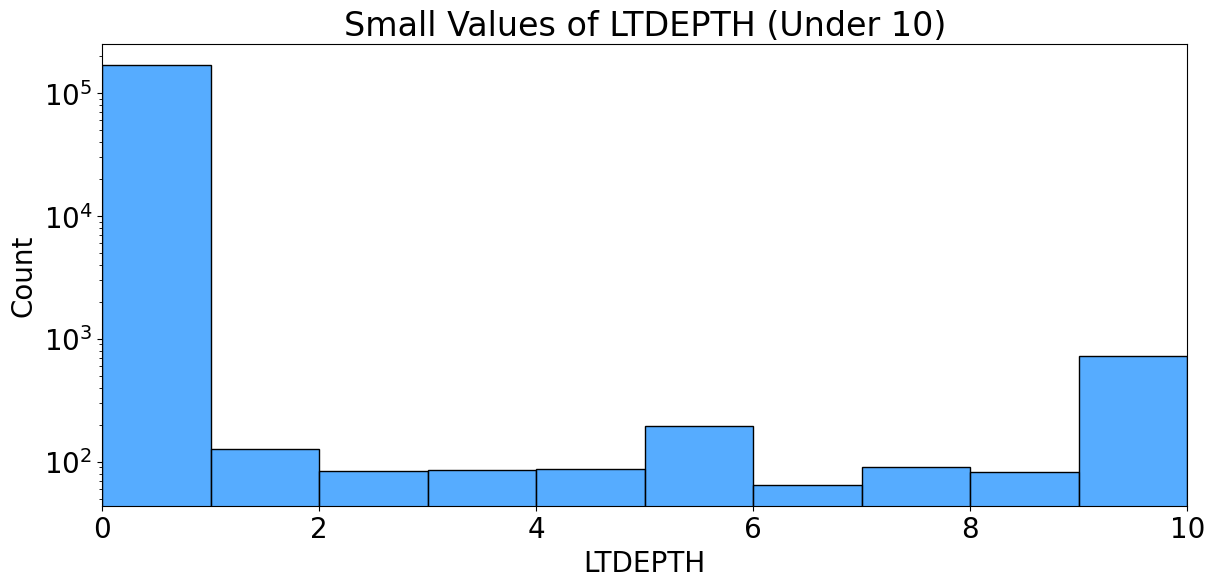

In [214]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0, xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['LTDEPTH'], bins = 10, kde = False, color = 'dodgerblue')
plt.xlabel('LTDEPTH')
plt.ylabel('Count')
plt.title('Small Values of LTDEPTH (Under 10)')

plt.savefig('LTDEPTH small')

## EXT

In [68]:
len(data['EXT'].unique())

4

In [215]:
data['EXT'].unique()

array([nan, 'E', 'G', 'EG'], dtype=object)

In [69]:
data['EXT'].count() * 100 / numrecords

33.081884679092504

In [70]:
data['EXT'].value_counts()

EXT
G     266970
E      49442
EG     37893
Name: count, dtype: int64

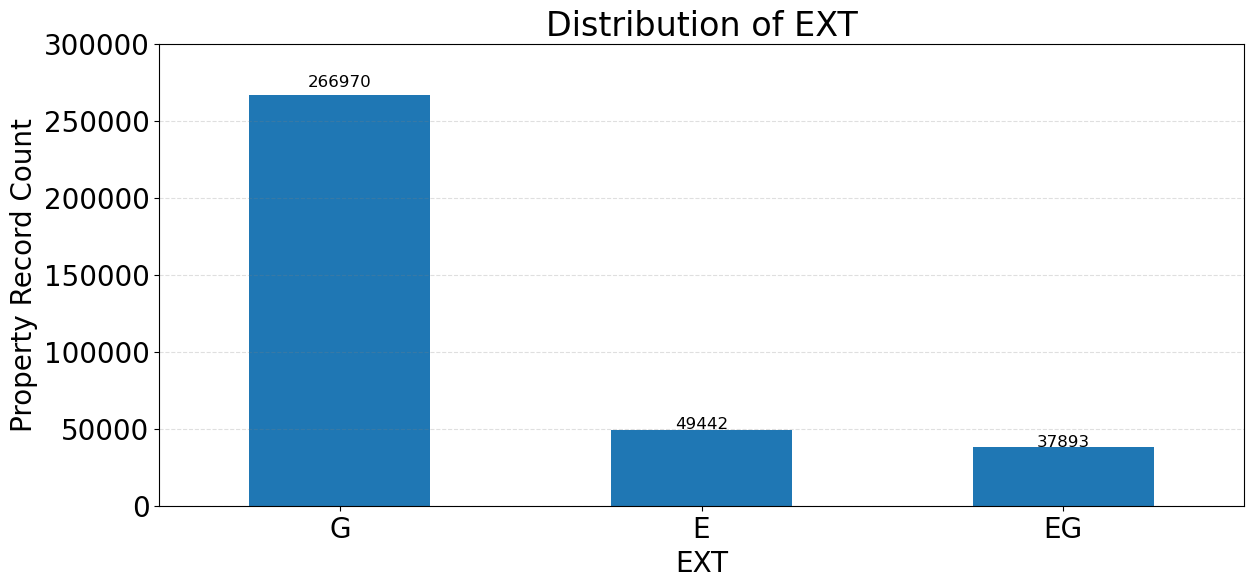

In [216]:
# Generate the bar plot
counts = data['EXT'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylim(0,300000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.02, str(v), color='black', ha='center', fontsize=12)

# Set titles for the graph and axes
plt.title('Distribution of EXT')
plt.xlabel('EXT')
plt.ylabel('Property Record Count', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('EXT')

/var/folders/lj/vjjcnvz53rq6gytkbpl_lsvr0000gn/T/ipykernel_20938/3182041111.py:4: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,300000)


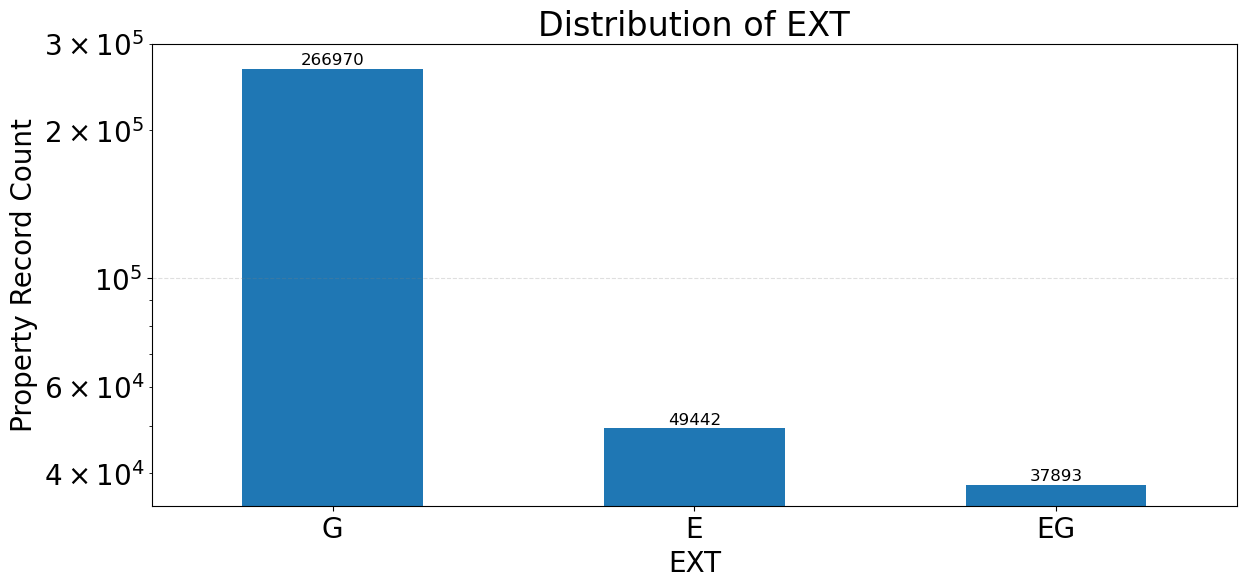

In [218]:
counts = data['EXT'].value_counts().head(20)
ax = counts.plot(kind='bar', logy = True)
plt.xticks(rotation=0)
plt.ylim(0,300000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.02, str(v), color='black', ha='center', fontsize=12)

# Set titles for the graph and axes
plt.title('Distribution of EXT')
plt.xlabel('EXT')
plt.ylabel('Property Record Count', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('EXT')

## STORIES

In [72]:
len(data['STORIES'].unique())

112

In [73]:
data['STORIES'].count() * 100 / numrecords

94.74656253909919

In [74]:
data['STORIES'].value_counts()

STORIES
2.00      415092
3.00      130127
1.00       96706
2.50       82292
4.00       38342
           ...  
78.00          1
61.00          1
2.10           1
114.00         1
82.00          1
Name: count, Length: 111, dtype: int64

In [75]:
data['STORIES'].max()

119.0

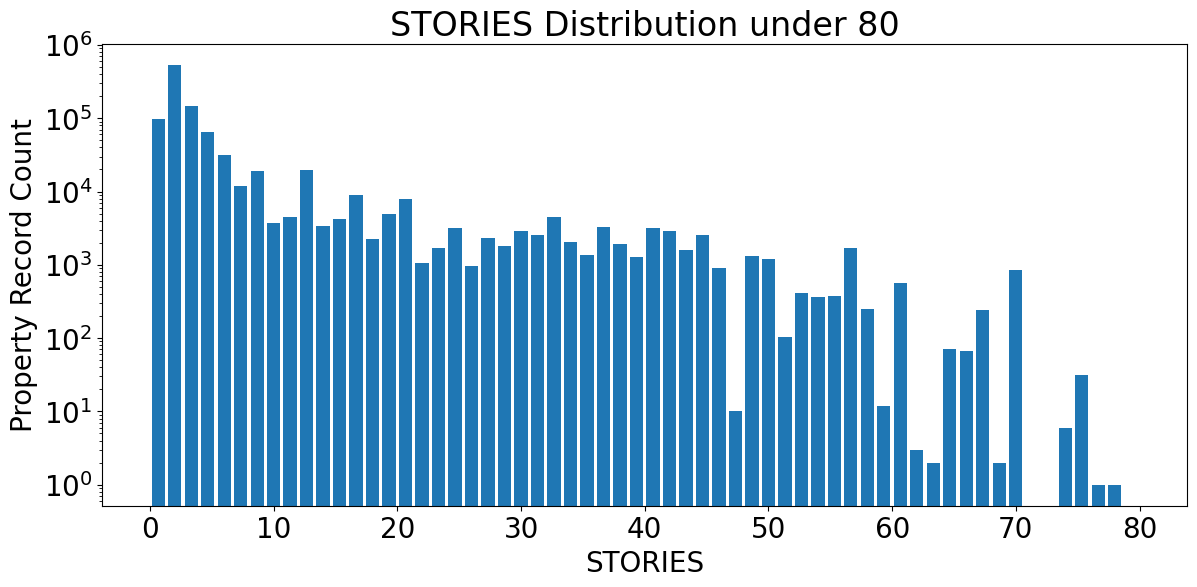

In [220]:
# plotting a histogram
range = (0, 80)
bins = 60

plt.hist(data['STORIES'], bins, range, histtype = 'bar', rwidth = 0.8)

plt.yscale('log')
plt.xlabel('STORIES')
plt.ylabel('Property Record Count')
plt.title('STORIES Distribution under 80')

plt.savefig('STORIES')

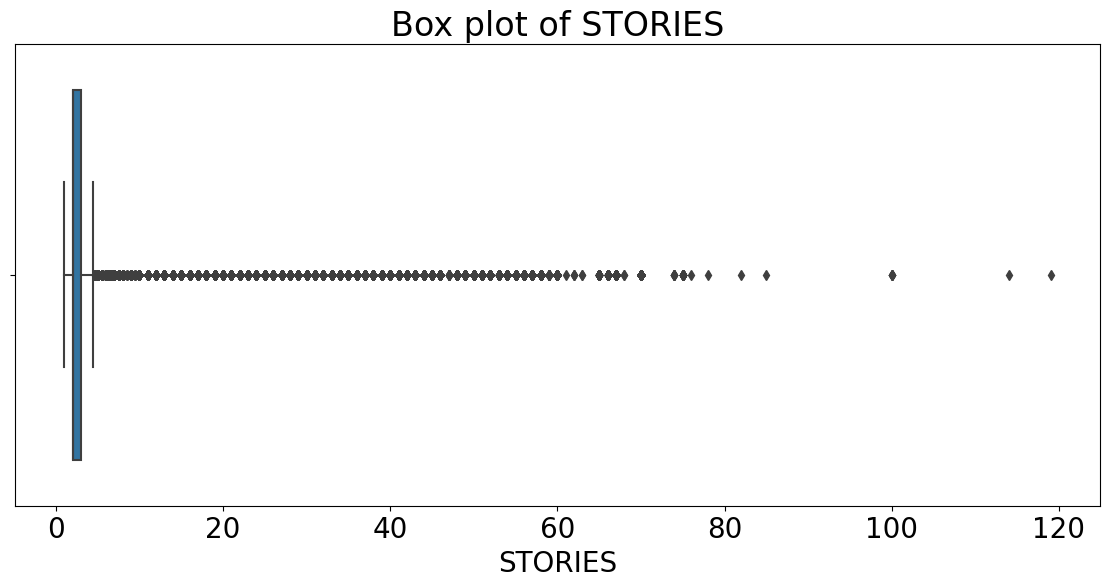

In [77]:
sns.boxplot(x = 'STORIES', data = data)

plt.xlabel('STORIES')
plt.title('Box plot of STORIES')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


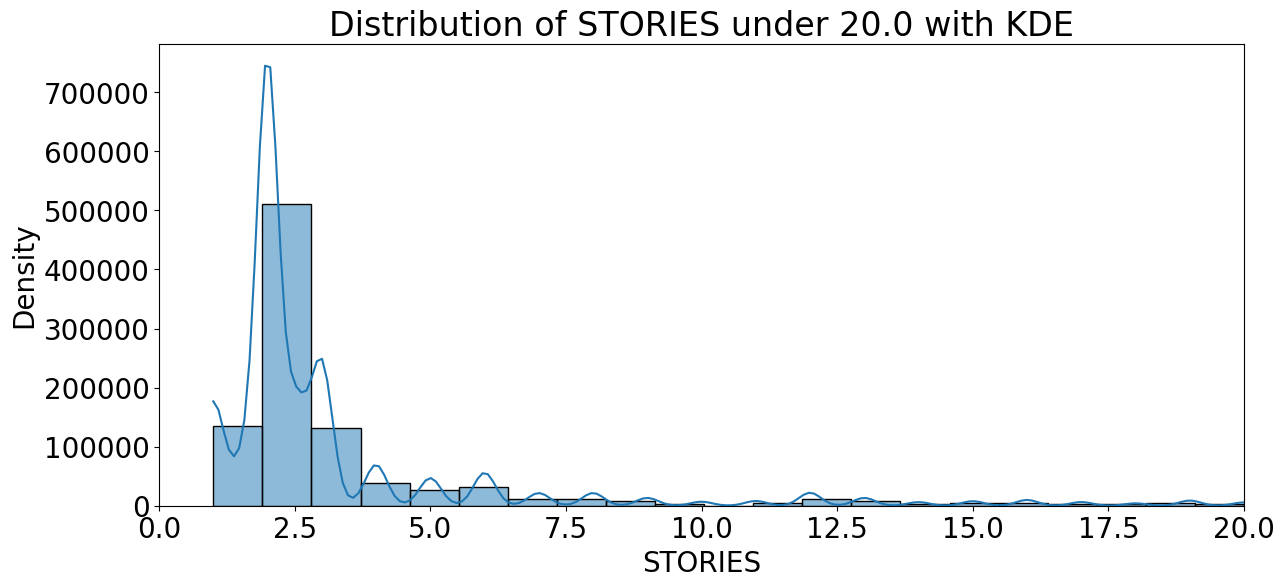

In [221]:
xhigh = 20
temp = data[data['STORIES'] > 0]
temp.count()
plt.xlim(0, xhigh)
temp = data[data['STORIES'] <= xhigh]
sns.histplot(temp['STORIES'],bins = 21, kde = True)

plt.xlabel('STORIES')
plt.ylabel('Density')
plt.title('Distribution of STORIES under 20.0 with KDE')
plt.show()

## FULLVAL

In [79]:
len(data['FULLVAL'].unique())

109324

In [80]:
data['FULLVAL'].count() * 100 / numrecords

100.0

In [81]:
data['FULLVAL'].value_counts()

FULLVAL
0.00          13007
502000.00      2796
366000.00      2290
397000.00      2231
472000.00      2223
              ...  
770949.00         1
220739.00         1
815522.00         1
1185230.00        1
883453.00         1
Name: count, Length: 109324, dtype: int64

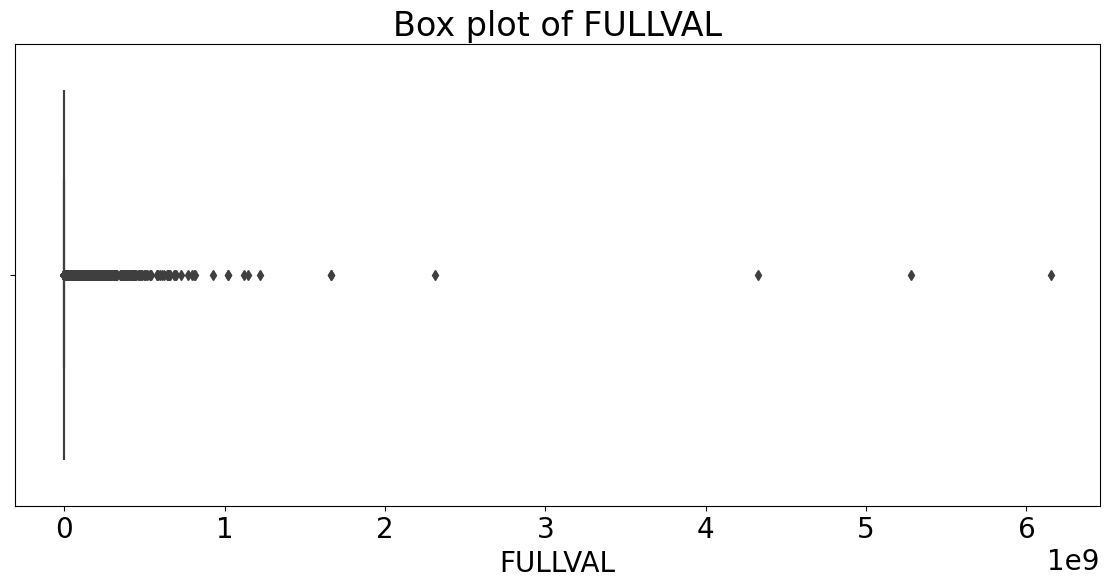

In [82]:
sns.boxplot(x = 'FULLVAL', data = data)

plt.xlabel('FULLVAL')
plt.title('Box plot of FULLVAL')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


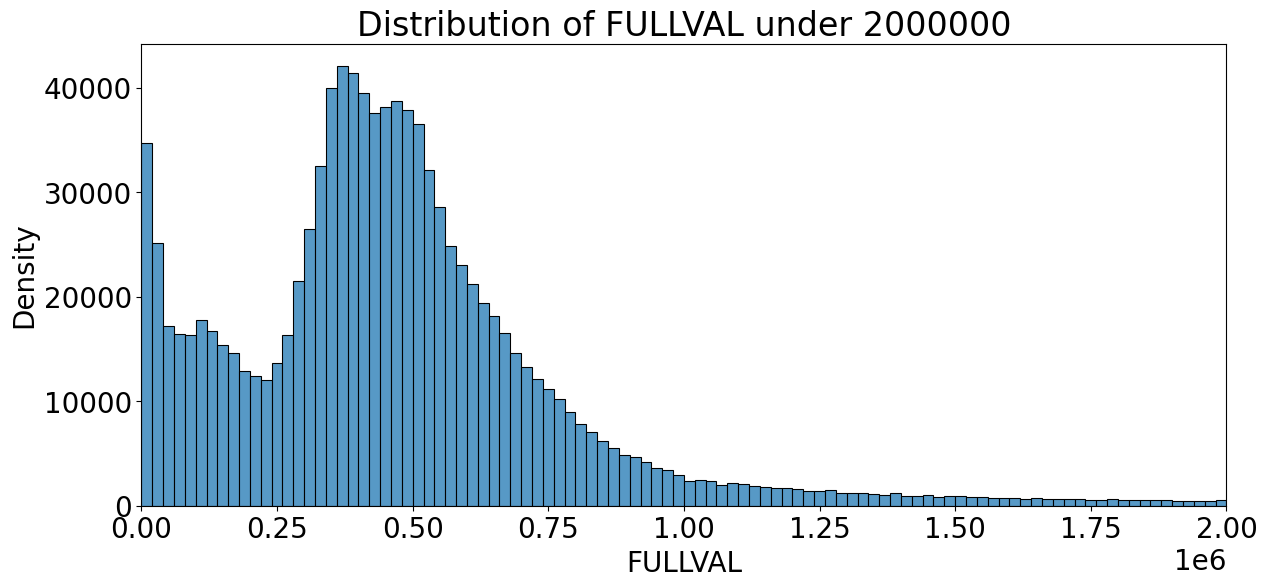

<Figure size 1400x600 with 0 Axes>

In [224]:
xhigh = 2000000
plt.xlim(0, xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.histplot(temp['FULLVAL'], bins = 100, kde = False)


plt.xlabel('FULLVAL')
plt.ylabel('Density')
plt.title('Distribution of FULLVAL under 2000000')

plt.show()
plt.savefig('FULLVAL')

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


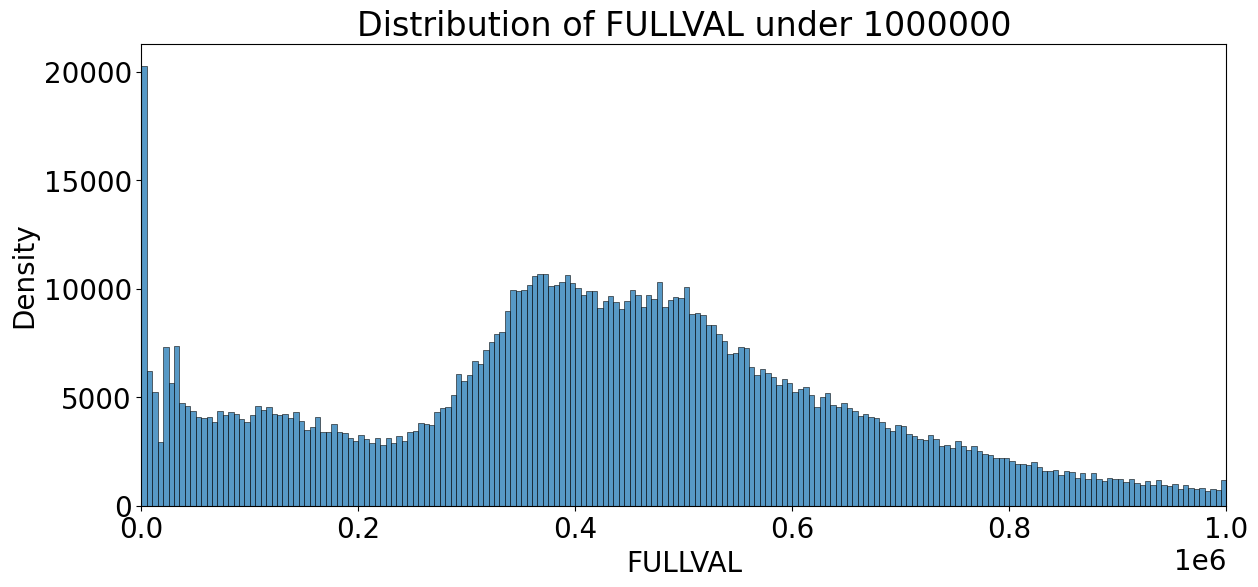

In [223]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.histplot(temp['FULLVAL'],bins = 200, kde = False)

plt.xlabel('FULLVAL')
plt.ylabel('Density')
plt.title('Distribution of FULLVAL under 1000000')

plt.show()

## AVLAND

In [85]:
len(data['AVLAND'].unique())

70921

In [86]:
data['AVLAND'].count() * 100 / numrecords

100.0

In [87]:
data['AVLAND'].value_counts()

AVLAND
0.00        13009
45000.00     1229
90000.00      999
3045.00       873
22500.00      847
            ...  
76347.00        1
89178.00        1
82761.00        1
38044.00        1
34827.00        1
Name: count, Length: 70921, dtype: int64

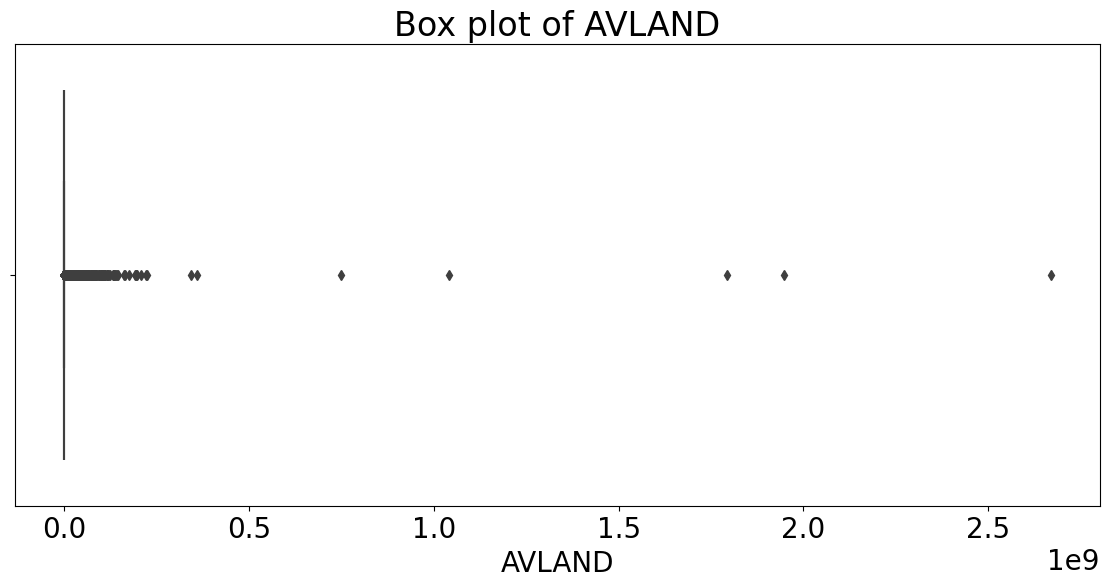

In [88]:
sns.boxplot(x = 'AVLAND', data = data)

plt.xlabel('AVLAND')
plt.title('Box plot of AVLAND')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


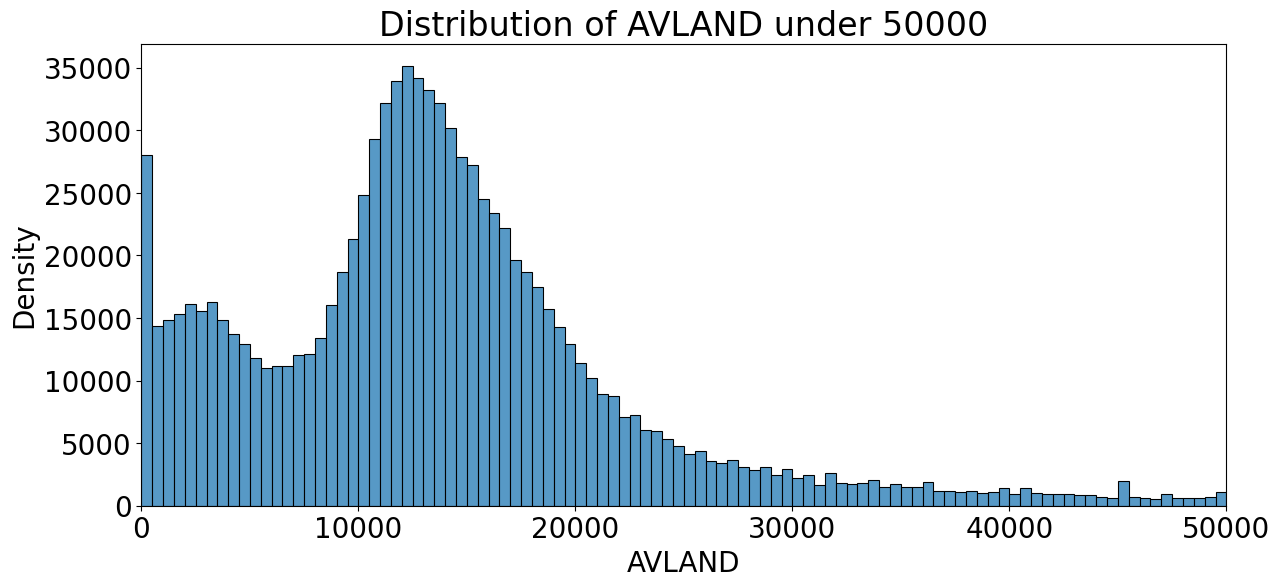

<Figure size 1400x600 with 0 Axes>

In [225]:
xhigh = 50000
plt.xlim(0, xhigh)
temp = data[data['AVLAND'] <= xhigh]
sns.histplot(temp['AVLAND'],bins=100, kde = False)

plt.xlabel('AVLAND')
plt.ylabel('Density')
plt.title('Distribution of AVLAND under 50000')

plt.show()
plt.savefig('AVLAND')

## AVTOT

In [90]:
len(data['AVTOT'].unique())

112914

In [91]:
data['AVTOT'].count() * 100 / numrecords

100.0

In [92]:
data['AVTOT'].value_counts()

AVTOT
0.00         13007
16588.00      3129
17914.00      2989
18973.00      2457
19780.00      2450
             ...  
77868.00         1
47068.00         1
40715.00         1
113239.00        1
23795.00         1
Name: count, Length: 112914, dtype: int64

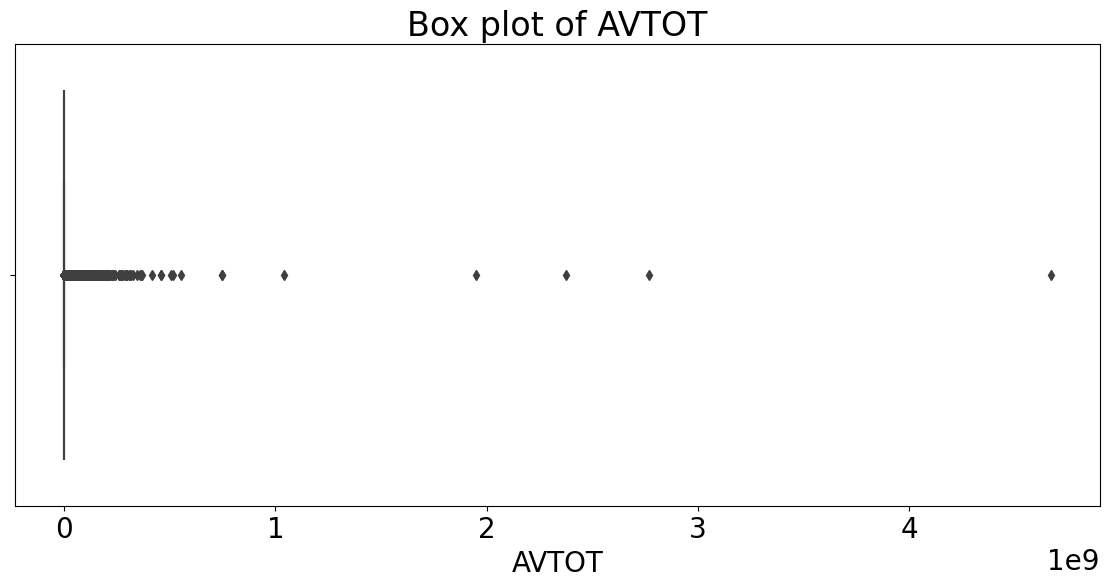

In [93]:
sns.boxplot(x = 'AVTOT', data = data)

plt.xlabel('AVTOT')
plt.title('Box plot of AVTOT')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


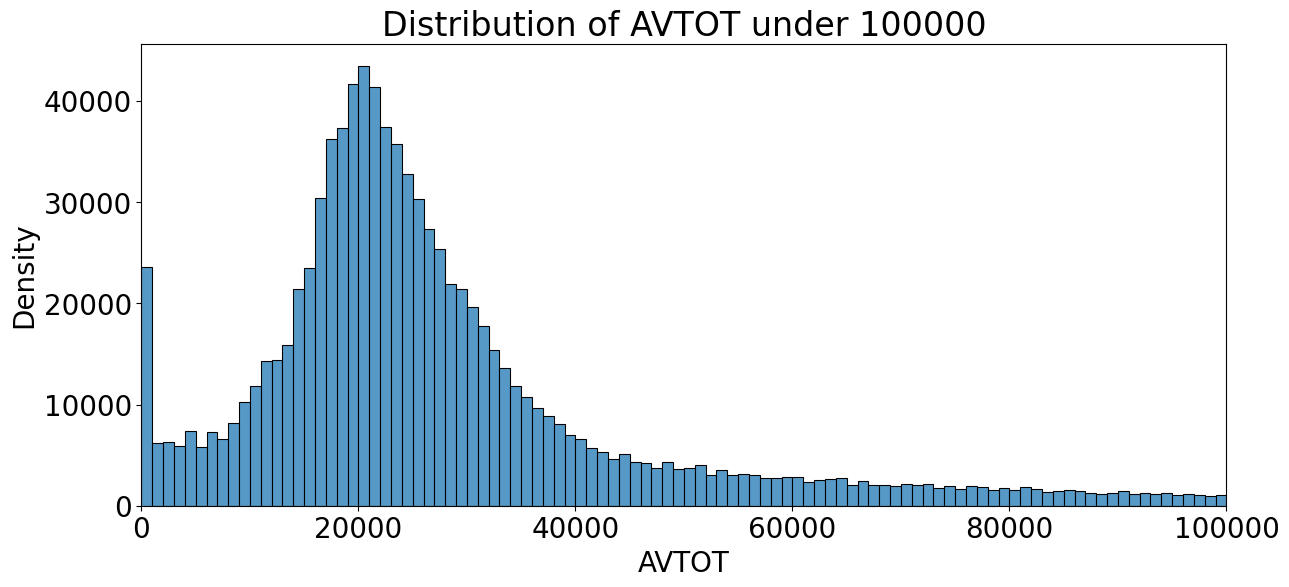

<Figure size 1400x600 with 0 Axes>

In [226]:
xhigh = 100000
plt.xlim(0, xhigh)
temp = data[data['AVTOT'] <= xhigh]
sns.histplot(temp['AVTOT'],bins = 100, kde = False)

plt.xlabel('AVTOT')
plt.ylabel('Density')
plt.title('Distribution of AVTOT under 100000')

plt.show()
plt.savefig('AVTOT')

## EXLAND

In [95]:
len(data['EXLAND'].unique())

33419

In [96]:
data['EXLAND'].count() * 100 / numrecords

100.0

In [97]:
data['EXLAND'].value_counts()

EXLAND
0.00        491699
1620.00     357182
2090.00      31112
3240.00      21519
5760.00       3560
             ...  
45973.00         1
41042.00         1
37028.00         1
34354.00         1
18847.00         1
Name: count, Length: 33419, dtype: int64

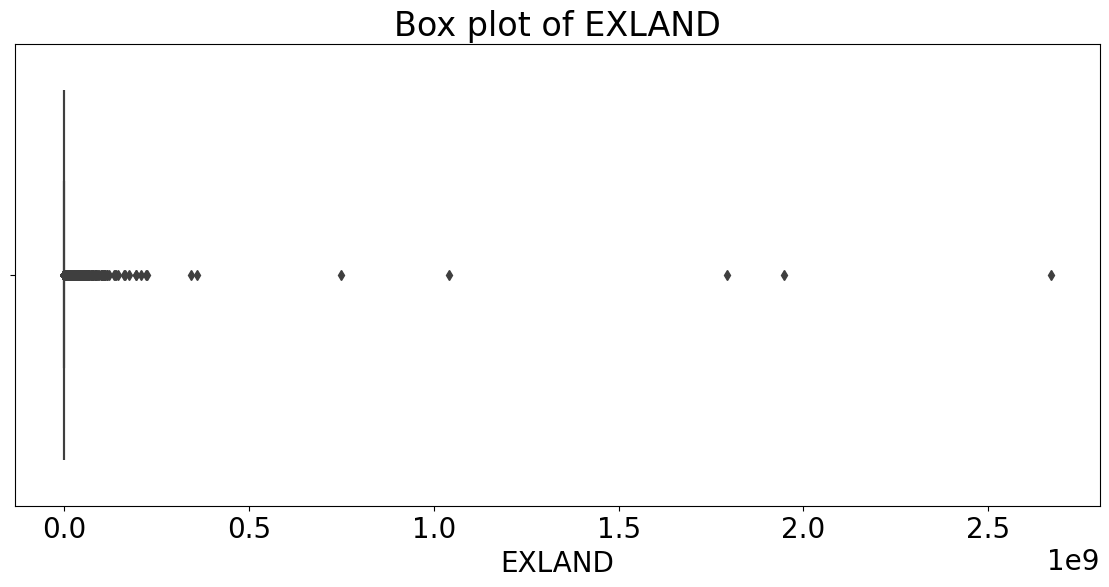

In [98]:
sns.boxplot(x = 'EXLAND', data = data)

plt.xlabel('EXLAND')
plt.title('Box plot of EXLAND')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


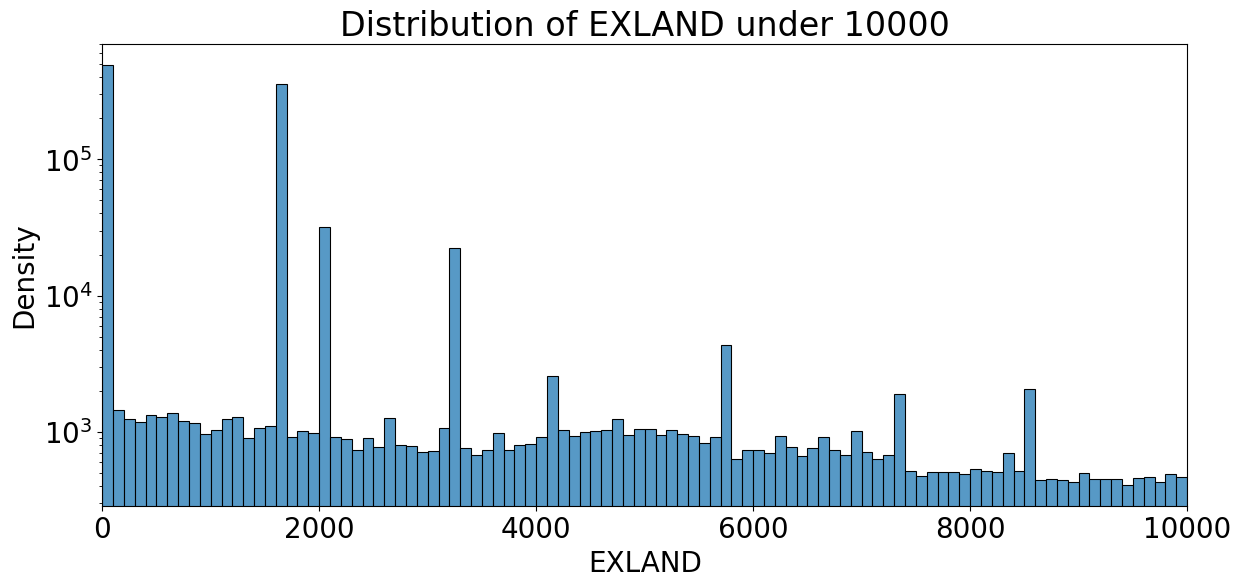

<Figure size 1400x600 with 0 Axes>

In [227]:
xhigh = 10000
plt.xlim(0, xhigh)
temp = data[data['EXLAND'] <= xhigh]
sns.histplot(temp['EXLAND'],bins = 100, kde = False)

plt.yscale('log')
plt.xlabel('EXLAND')
plt.ylabel('Density')
plt.title('Distribution of EXLAND under 10000')
plt.show()
plt.savefig('EXLAND')

## EXTOT

In [100]:
len(data['EXTOT'].unique())

64255

In [101]:
data['EXTOT'].count() * 100 / numrecords

100.0

In [102]:
data['EXTOT'].value_counts()

EXTOT
0.00         432572
1620.00      354880
2090.00       30069
3240.00       21803
5760.00        3549
              ...  
197442.00         1
331100.00         1
719300.00         1
50976.00          1
397554.00         1
Name: count, Length: 64255, dtype: int64

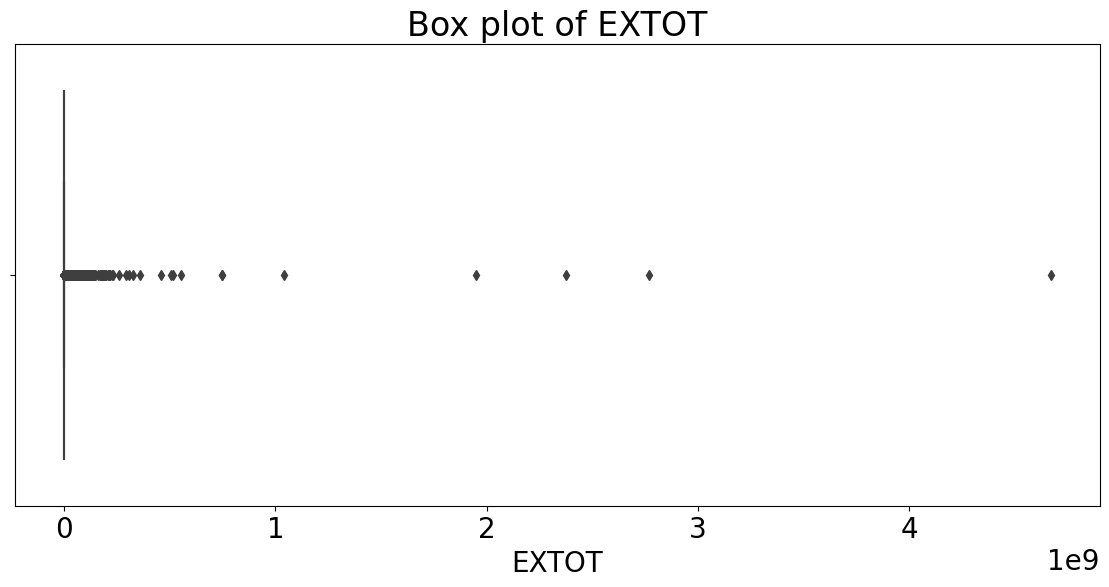

In [103]:
sns.boxplot(x = 'EXTOT', data = data)

plt.xlabel('EXTOT')
plt.title('Box plot of EXTOT')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


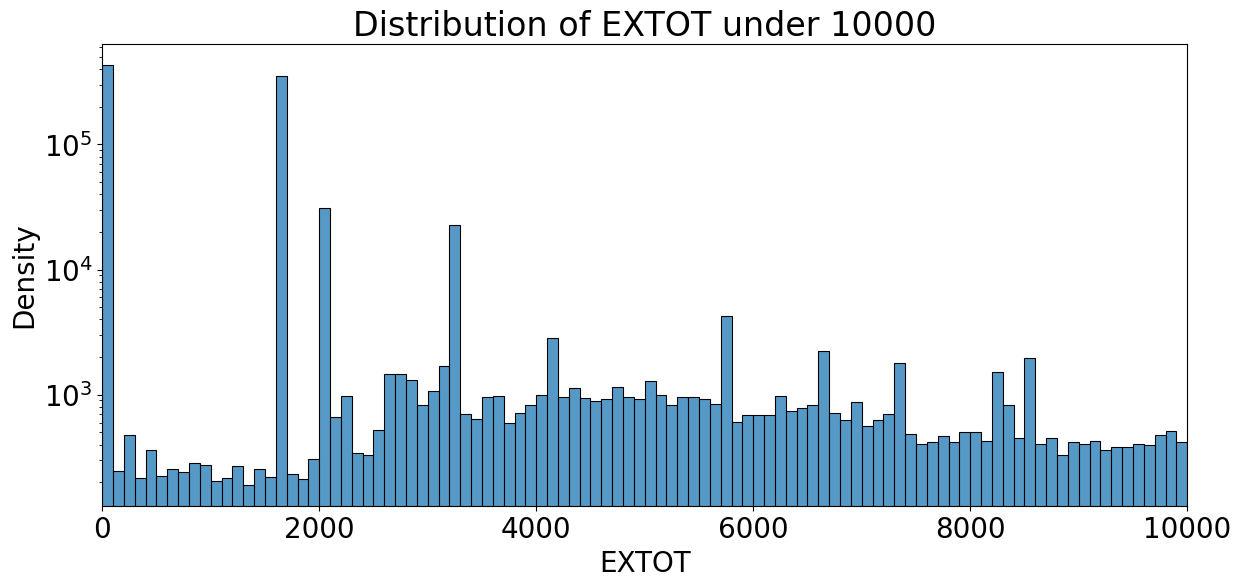

<Figure size 1400x600 with 0 Axes>

In [228]:
xhigh = 10000
plt.xlim(0, xhigh)
temp = data[data['EXTOT'] <= xhigh]
sns.histplot(temp['EXTOT'],bins = 100, kde = False)

plt.yscale('log')
plt.xlabel('EXTOT')
plt.ylabel('Density')
plt.title('Distribution of EXTOT under 10000')
plt.show()
plt.savefig('EXTOT')

## EXCD1

In [105]:
len(data['EXCD1'].unique())

130

In [106]:
data['EXCD1'].count() * 100 / numrecords

59.616393742635346

In [107]:
data['EXCD1'].value_counts()

EXCD1
1017.00    425348
1010.00     49756
1015.00     31323
5113.00     23858
1920.00     17594
            ...  
1606.00         1
4650.00         1
1841.00         1
1562.00         1
1992.00         1
Name: count, Length: 129, dtype: int64

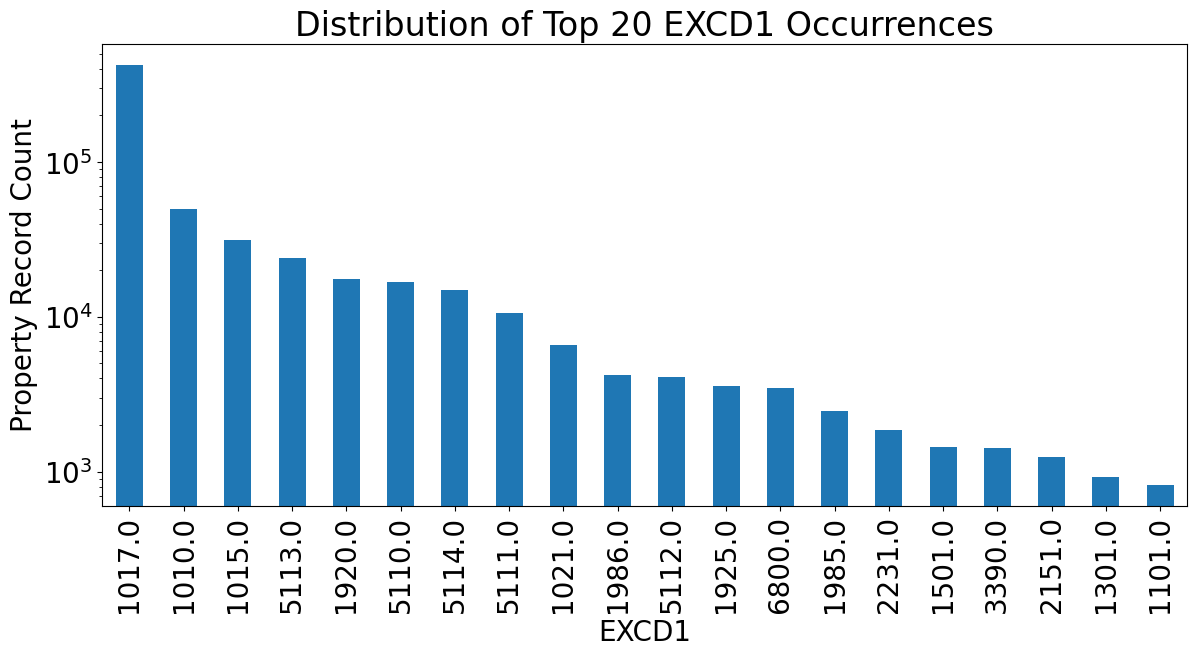

In [229]:
data['EXCD1'].value_counts().head(20).plot(kind = 'bar')
plt.yscale('log')

plt.xlabel('EXCD1')
plt.ylabel('Property Record Count')
plt.title('Distribution of Top 20 EXCD1 Occurrences')

plt.savefig('EXCD1')

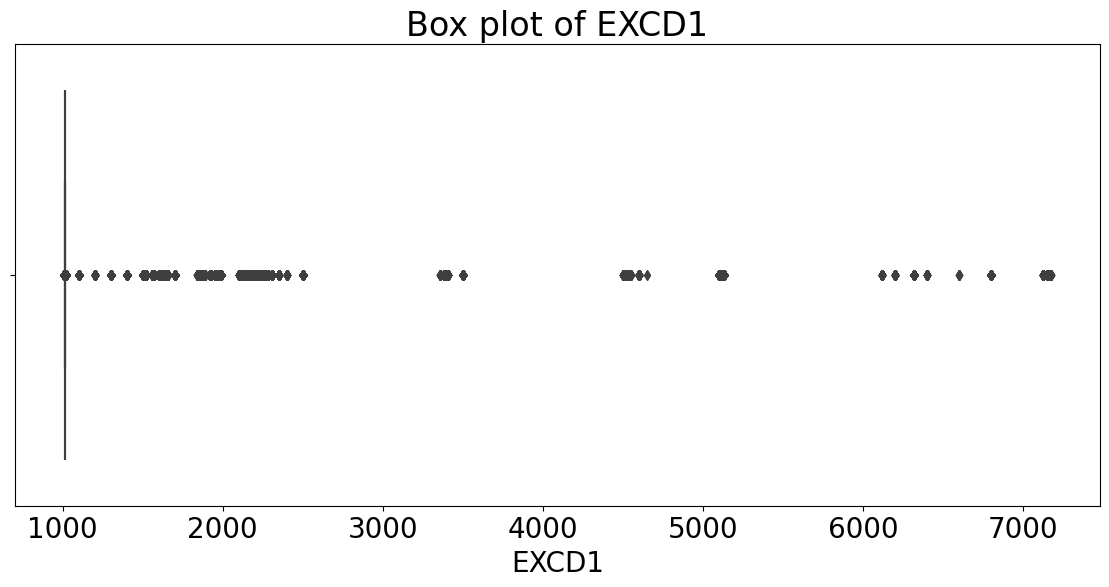

In [109]:
sns.boxplot(x = 'EXCD1', data = data)

plt.xlabel('EXCD1')
plt.title('Box plot of EXCD1')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


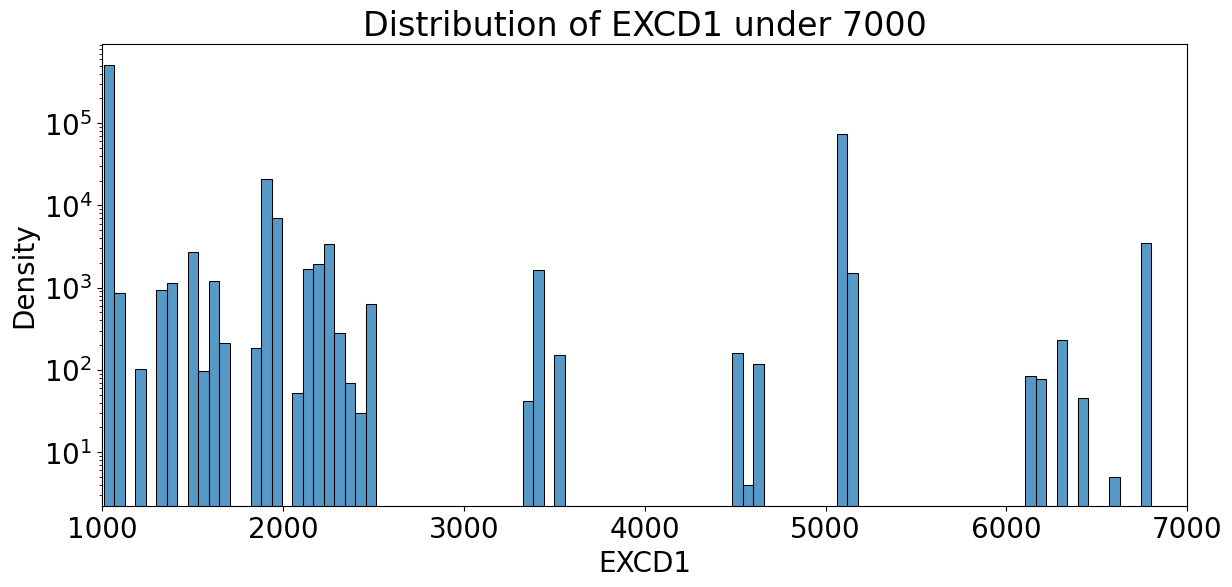

In [230]:
xhigh = 7000
plt.xlim(1000, xhigh)
temp = data[data['EXCD1'] <= xhigh]
sns.histplot(temp['EXCD1'],bins = 100, kde = False)

plt.yscale('log')
plt.xlabel('EXCD1')
plt.ylabel('Density')
plt.title('Distribution of EXCD1 under 7000')
plt.show()

## STADDR

In [111]:
len(data['STADDR'].unique())

839281

In [112]:
data['STADDR'].count() * 100 / numrecords

99.93688106562689

In [113]:
data['STADDR'].value_counts()

STADDR
501 SURF AVENUE       902
330 EAST 38 STREET    817
322 WEST 57 STREET    720
155 WEST 68 STREET    671
20 WEST 64 STREET     657
                     ... 
1349 55 STREET          1
1347 55 STREET          1
1345 55 STREET          1
1343 55 STREET          1
162 BENTLEY STREET      1
Name: count, Length: 839280, dtype: int64

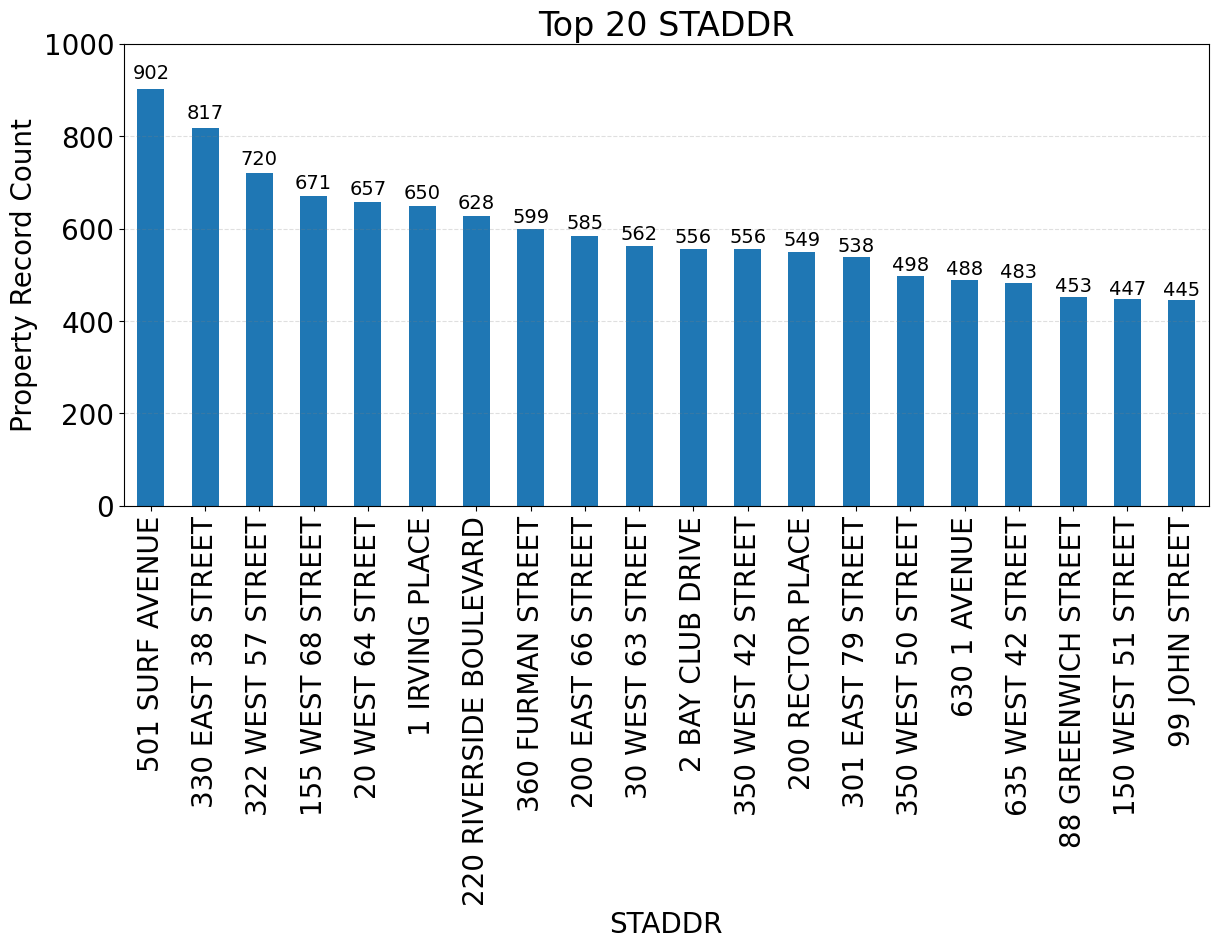

In [231]:
# Generate the bar plot
counts = data['STADDR'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylim(0,1000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.025, str(v), color='black', ha='center', fontsize=14)

# Set titles for the graph and axes
plt.title('Top 20 STADDR')
plt.xlabel('STADDR')
plt.ylabel('Property Record Count', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('STADDR')

## ZIP

In [115]:
len(data['ZIP'].unique())

197

In [116]:
data['ZIP'].count() * 100 / numrecords

97.20913469169761

In [117]:
data['ZIP'].value_counts()

ZIP
10314.00    24606
11234.00    20001
10312.00    18127
10462.00    16905
10306.00    16578
            ...  
11359.00        1
11005.00        1
10162.00        1
11352.00        1
11241.00        1
Name: count, Length: 196, dtype: int64

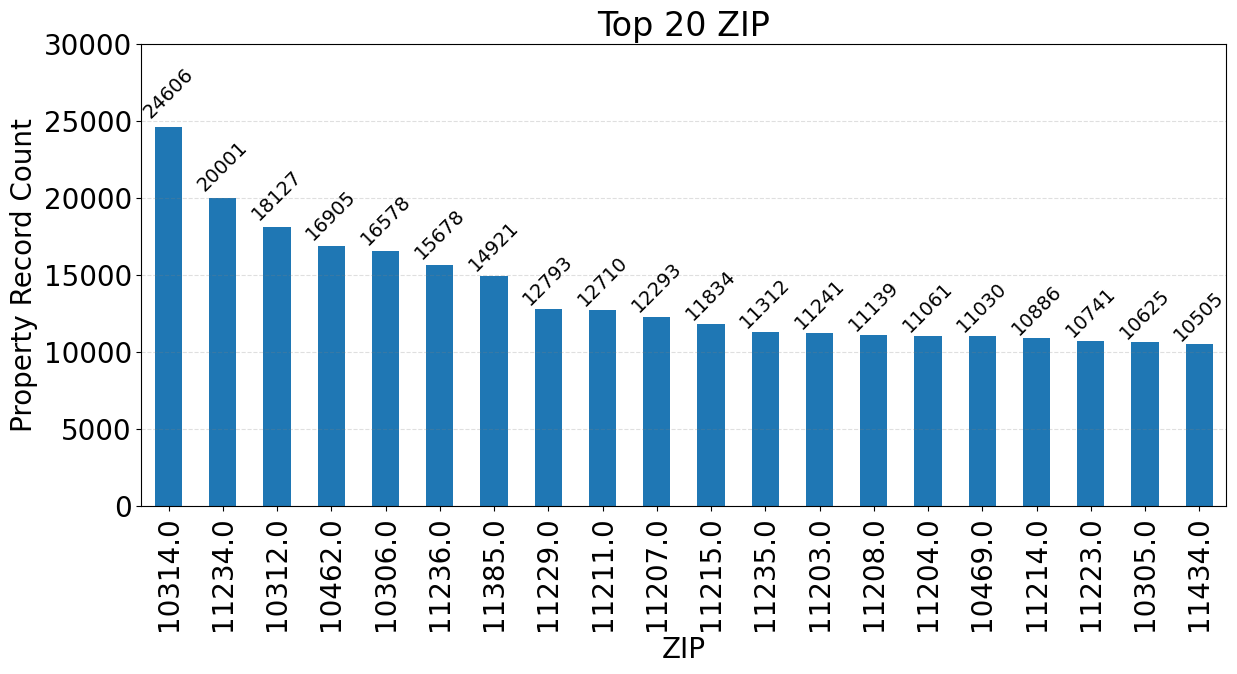

In [235]:
# Generate the bar plot
# fig = plt.figure(figsize=(18, 10))
counts = data['ZIP'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylim(0,30000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.025, str(v), color='black', ha='center', fontsize=14, rotation=45)

# Set titles for the graph and axes
plt.title('Top 20 ZIP')
plt.xlabel('ZIP')
plt.ylabel('Property Record Count', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('ZIP')

## EXMPTCL

In [119]:
len(data['EXMPTCL'].unique())

15

In [120]:
data['EXMPTCL'].count() * 100 / numrecords

1.4546299979271593

In [121]:
data['EXMPTCL'].value_counts()

EXMPTCL
X1    6912
X5    5208
X7     820
X2     770
X6     764
X4     441
X8     292
X3     259
X9     108
VI       1
KI       1
A9       1
R4       1
5        1
Name: count, dtype: int64

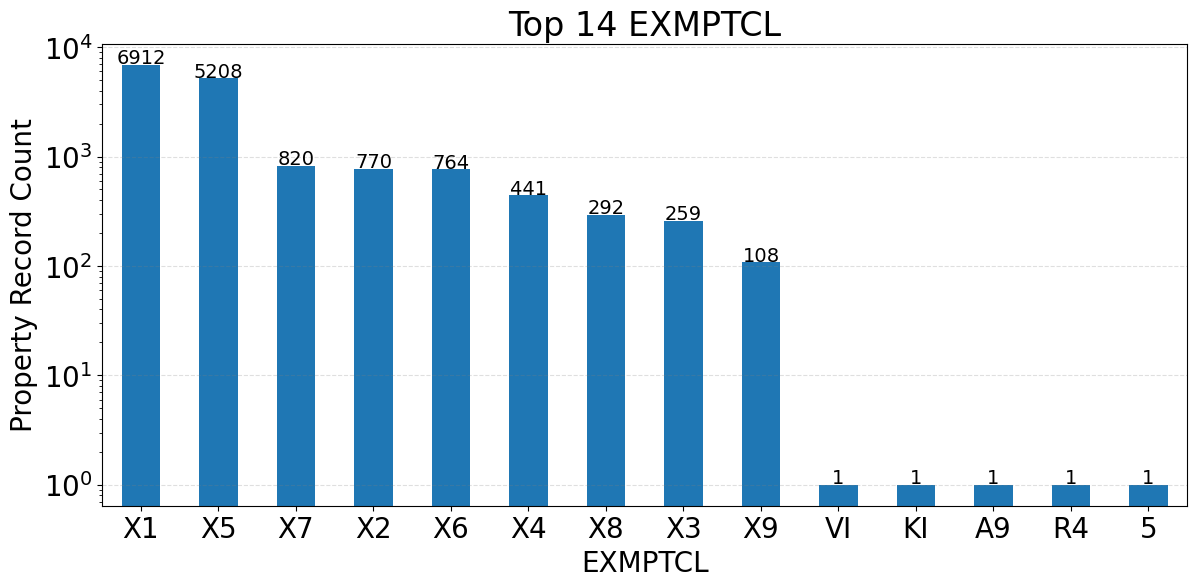

In [236]:
# Generate the bar plot
counts = data['EXMPTCL'].value_counts().head(14)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.yscale('log')


# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.025, str(v), color='black', ha='center', fontsize=14)

# Set titles for the graph and axes
plt.title('Top 14 EXMPTCL')
plt.xlabel('EXMPTCL')
plt.ylabel('Property Record Count', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('EXMPTCL')

## BLDFRONT

In [123]:
len(data['BLDFRONT'].unique())

612

In [124]:
data['BLDFRONT'].count() * 100 / numrecords

100.0

In [125]:
data['BLDFRONT'].value_counts()

BLDFRONT
0       228815
20      195101
18       77705
16       74687
25       63684
         ...  
618          1
1169         1
635          1
549          1
1818         1
Name: count, Length: 612, dtype: int64

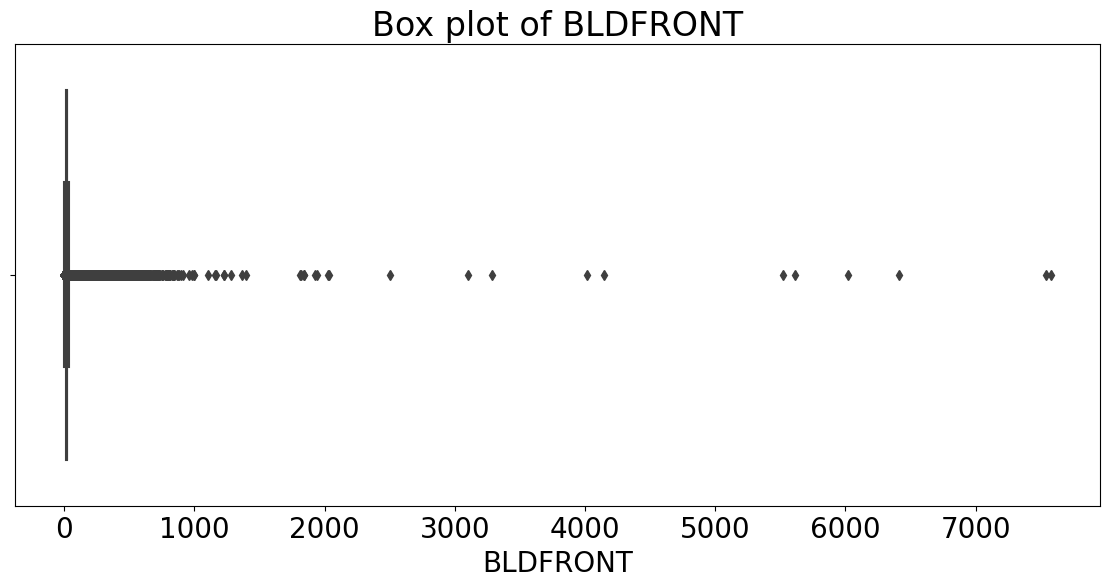

In [126]:
sns.boxplot(x = 'BLDFRONT', data = data)

plt.xlabel('BLDFRONT')
plt.title('Box plot of BLDFRONT')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


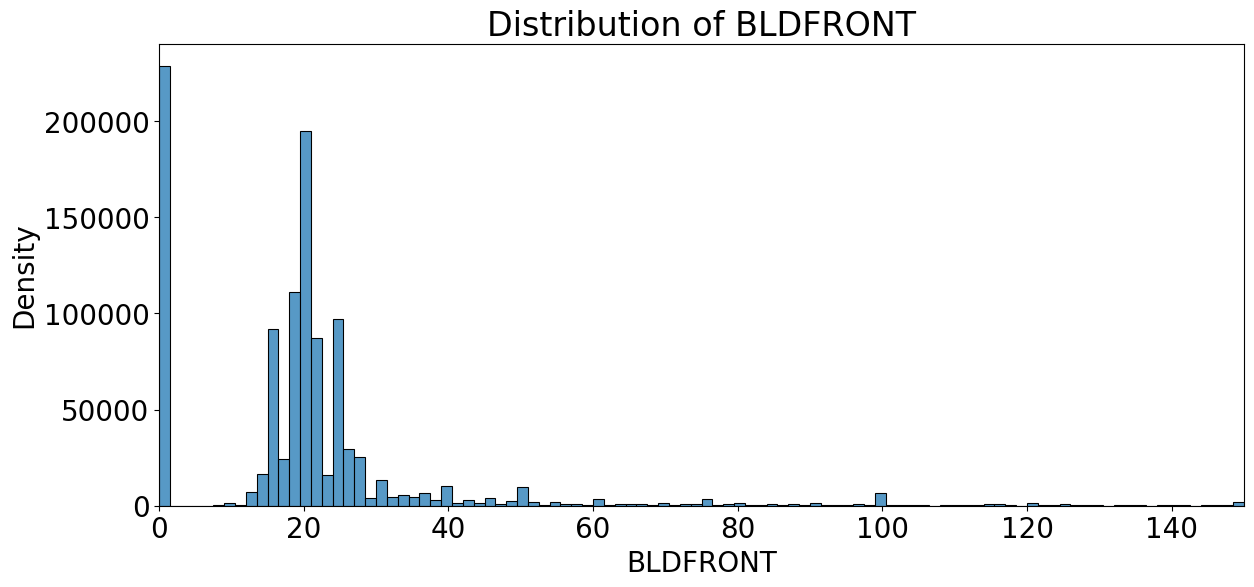

<Figure size 1400x600 with 0 Axes>

In [127]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
sns.histplot(temp['BLDFRONT'],bins = 100, kde = False)

plt.xlabel('BLDFRONT')
plt.ylabel('Density')
plt.title('Distribution of BLDFRONT')
plt.show()
plt.savefig('BLDFRONT')

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


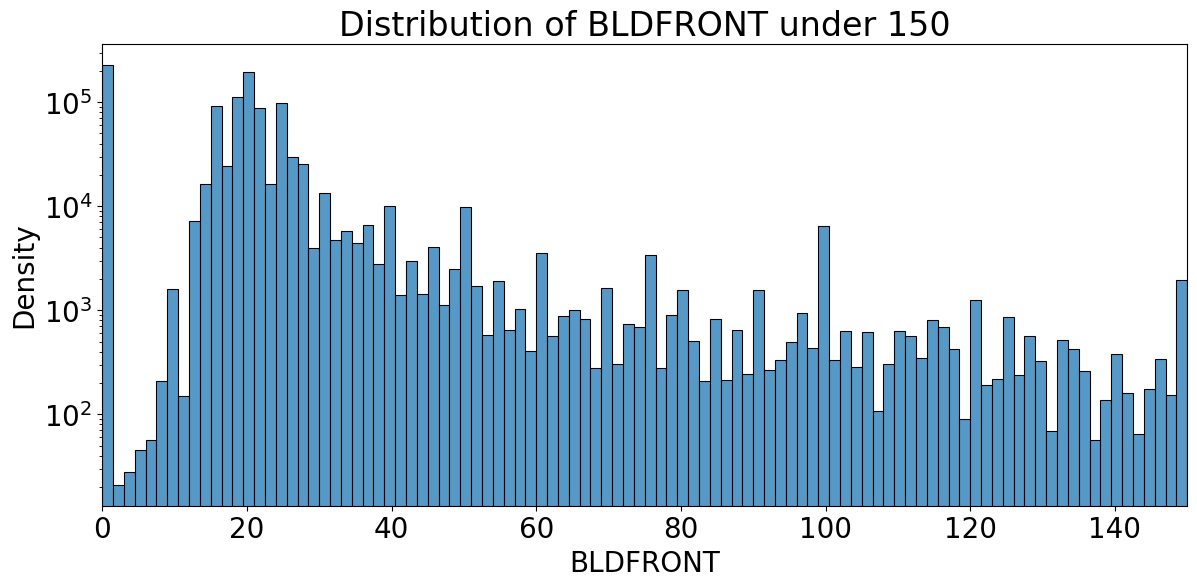

In [237]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
plt.yscale('log')
temp = data[data['BLDFRONT'] <= xhigh]
sns.histplot(temp['BLDFRONT'],bins = 100, kde = False)

plt.xlabel('BLDFRONT')
plt.ylabel('Density')
plt.title('Distribution of BLDFRONT under 150')
plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


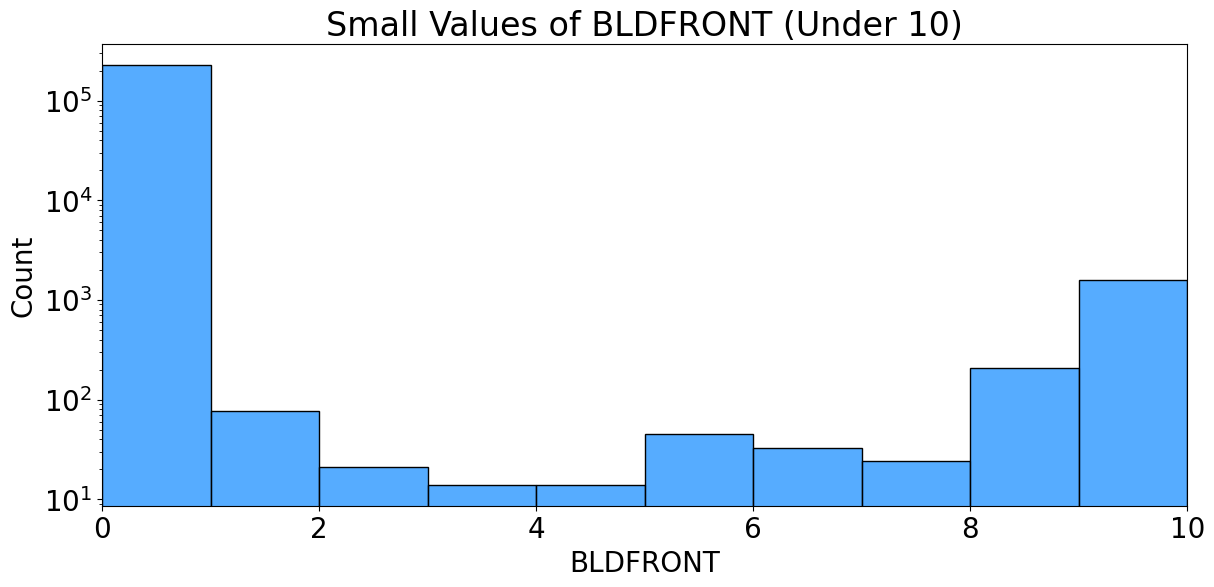

<Figure size 1400x600 with 0 Axes>

In [238]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0, xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['BLDFRONT'], bins = 10, kde = False, color = 'dodgerblue')

plt.xlabel('BLDFRONT')
plt.ylabel('Count')
plt.title('Small Values of BLDFRONT (Under 10)')
plt.show()
plt.savefig('BLDFRONT small')

## BLDDEPTH

In [130]:
len(data['BLDDEPTH'].unique())

621

In [131]:
data['BLDDEPTH'].count() * 100 / numrecords

100.0

In [132]:
data['BLDDEPTH'].value_counts()

BLDDEPTH
0       228853
40       48775
50       45358
45       40670
36       40109
         ...  
5000         1
581          1
438          1
475          1
780          1
Name: count, Length: 621, dtype: int64

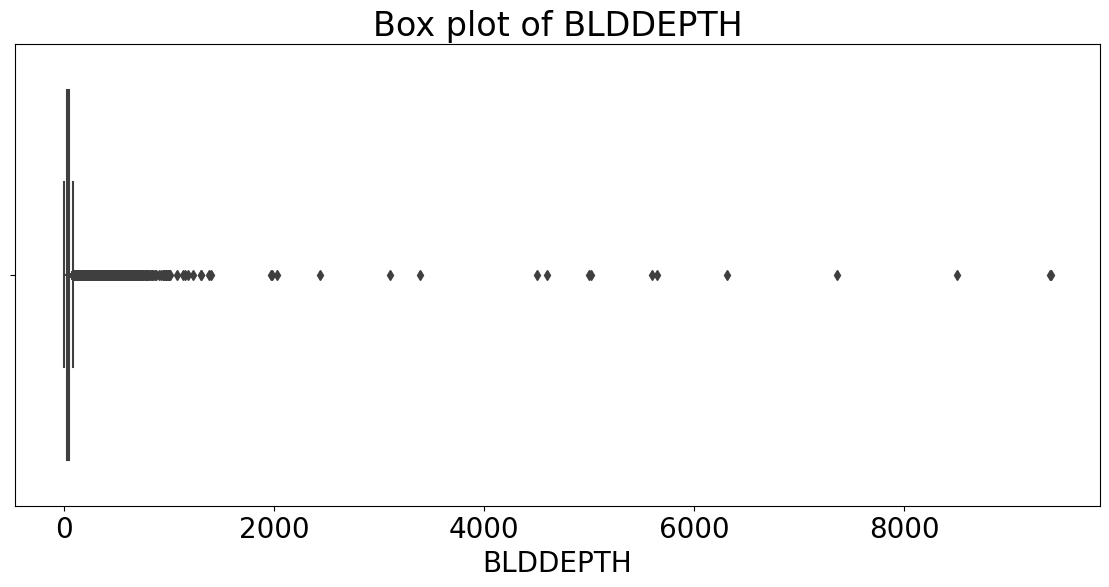

In [133]:
sns.boxplot(x = 'BLDDEPTH', data = data)

plt.xlabel('BLDDEPTH')
plt.title('Box plot of BLDDEPTH')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


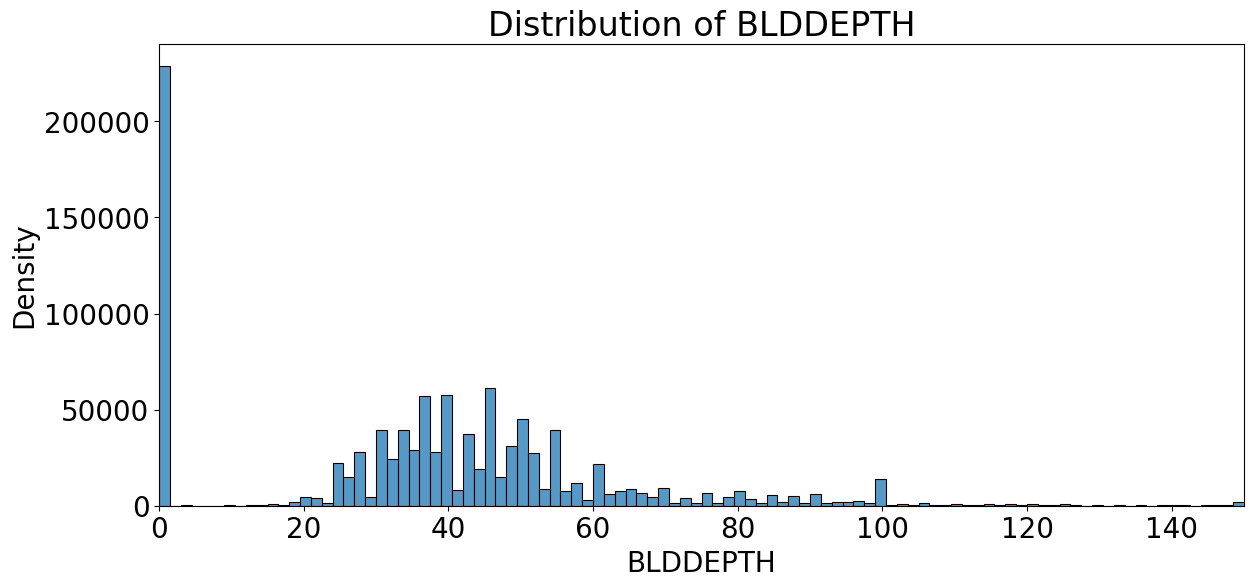

<Figure size 1400x600 with 0 Axes>

In [134]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
sns.histplot(temp['BLDDEPTH'],bins = 100, kde = False)

plt.xlabel('BLDDEPTH')
plt.ylabel('Density')
plt.title('Distribution of BLDDEPTH')
plt.show()
plt.savefig('BLDDEPTH')

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


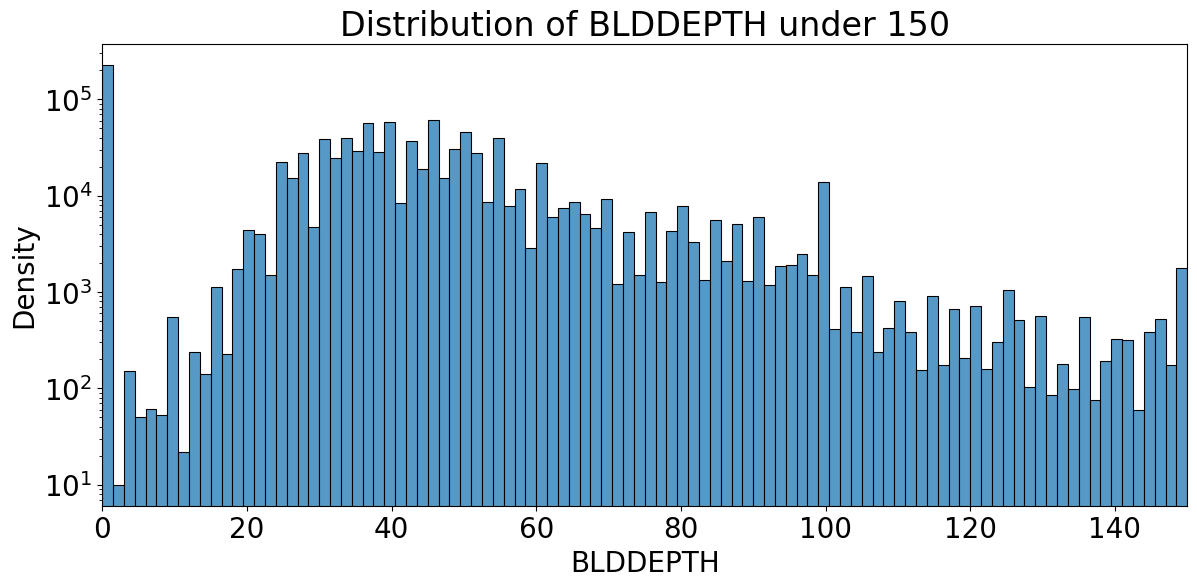

In [239]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
plt.yscale('log')
temp = data[data['BLDDEPTH'] <= xhigh]
sns.histplot(temp['BLDDEPTH'],bins = 100, kde = False)

plt.xlabel('BLDDEPTH')
plt.ylabel('Density')
plt.title('Distribution of BLDDEPTH under 150')
plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


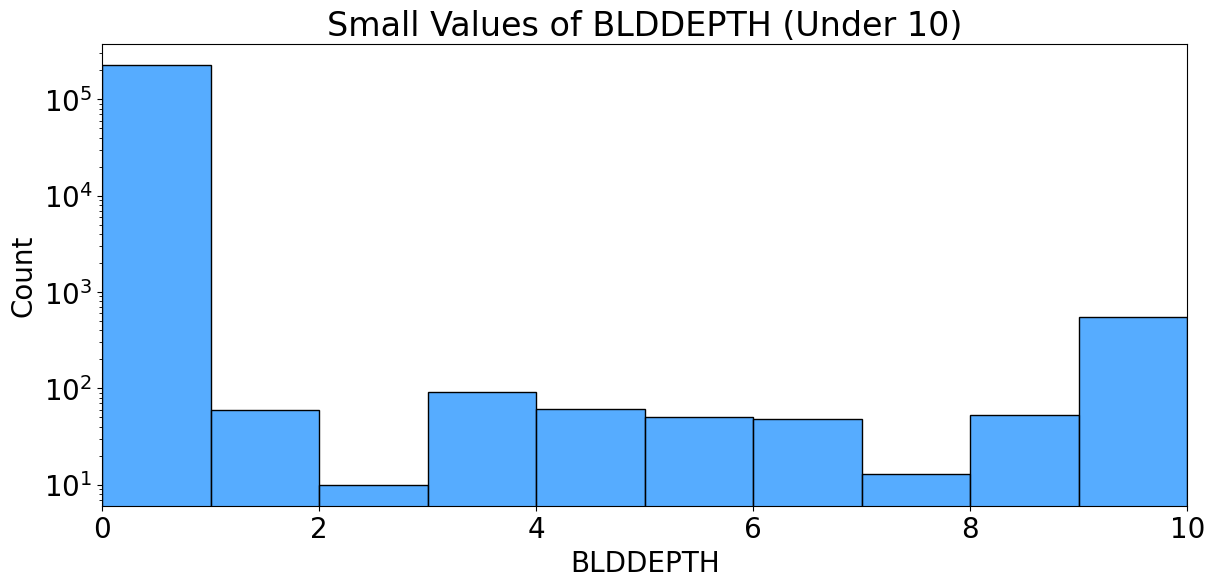

In [240]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['BLDDEPTH'], bins = 10, kde = False, color = 'dodgerblue')

plt.xlabel('BLDDEPTH')
plt.ylabel('Count')
plt.title('Small Values of BLDDEPTH (Under 10)')

plt.savefig('BLDDEPTH small')

## AVLAND2

In [137]:
len(data['AVLAND2'].unique())

58592

In [138]:
data['AVLAND2'].count() * 100 / numrecords

26.398467218303743

In [139]:
data['AVLAND2'].value_counts()

AVLAND2
2408.00     767
2233.00     610
45000.00    597
750.00      547
90000.00    511
           ... 
42115.00      1
71261.00      1
47768.00      1
41847.00      1
37857.00      1
Name: count, Length: 58591, dtype: int64

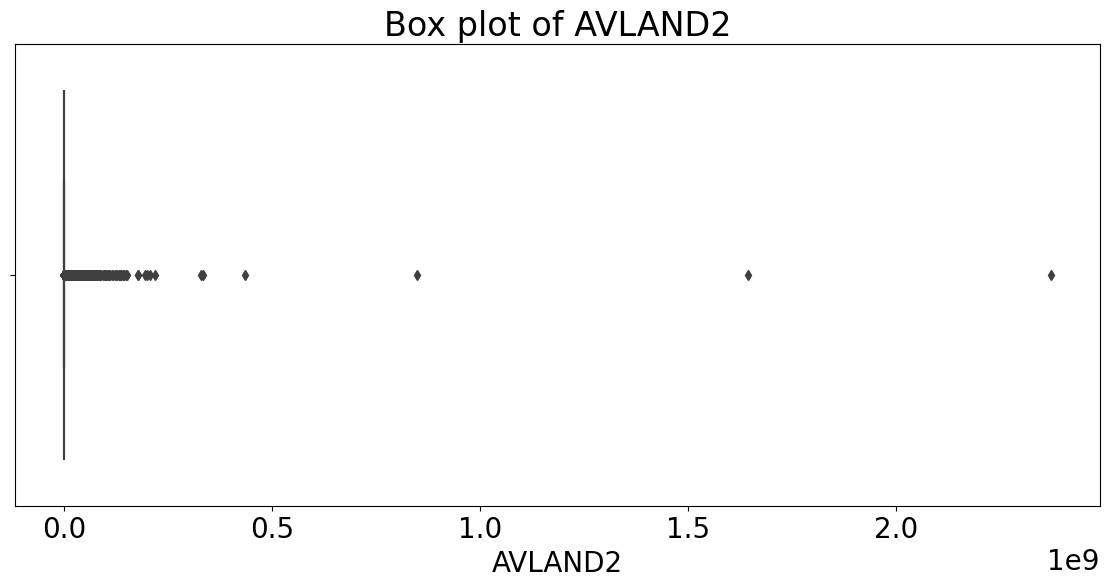

In [140]:
sns.boxplot(x = 'AVLAND2', data = data)

plt.xlabel('AVLAND2')
plt.title('Box plot of AVLAND2')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


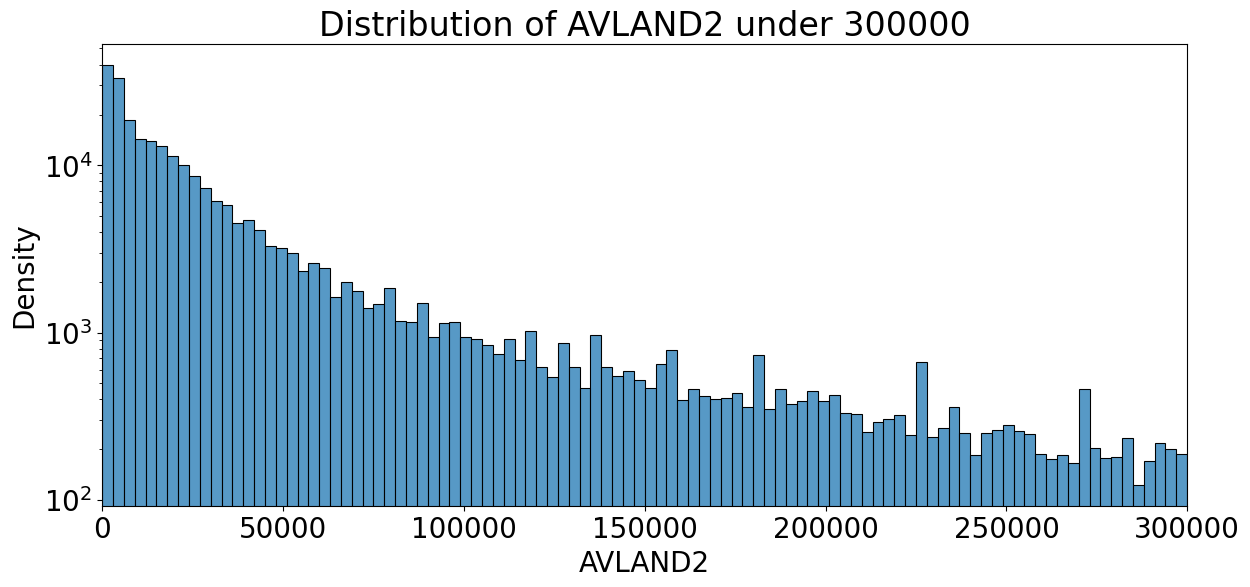

In [241]:
xhigh = 300000
plt.xlim(0,xhigh)
plt.yscale('log')
temp = data[data['AVLAND2'] <= xhigh]
sns.histplot(temp['AVLAND2'],bins = 100, kde = False)

plt.xlabel('AVLAND2')
plt.ylabel('Density')
plt.title('Distribution of AVLAND2 under 300000')
plt.savefig('AVLAND2')

plt.show()

## AVTOT2

In [142]:
len(data['AVTOT2'].unique())

111361

In [143]:
data['AVTOT2'].count() * 100 / numrecords

26.399027445531907

In [144]:
data['AVTOT2'].value_counts()

AVTOT2
750.00         656
62.00          383
9468.00        233
9104.00        232
9349.00        225
              ... 
4558800.00       1
439450.00        1
22230000.00      1
2424200.00       1
18360.00         1
Name: count, Length: 111360, dtype: int64

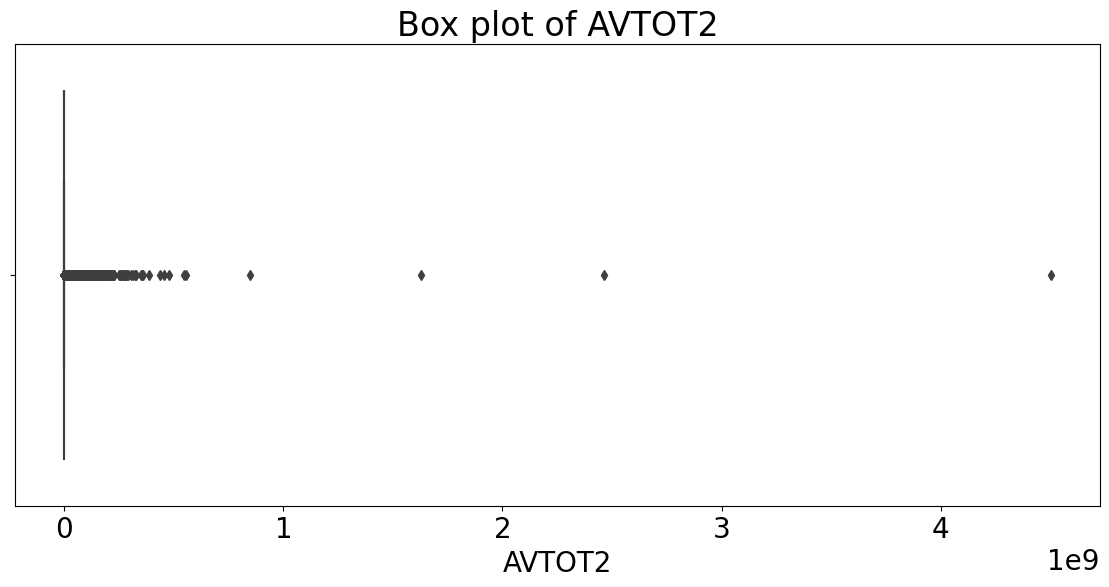

In [145]:
sns.boxplot(x = 'AVTOT2', data = data)

plt.xlabel('AVTOT2')
plt.title('Box plot of AVTOT2')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


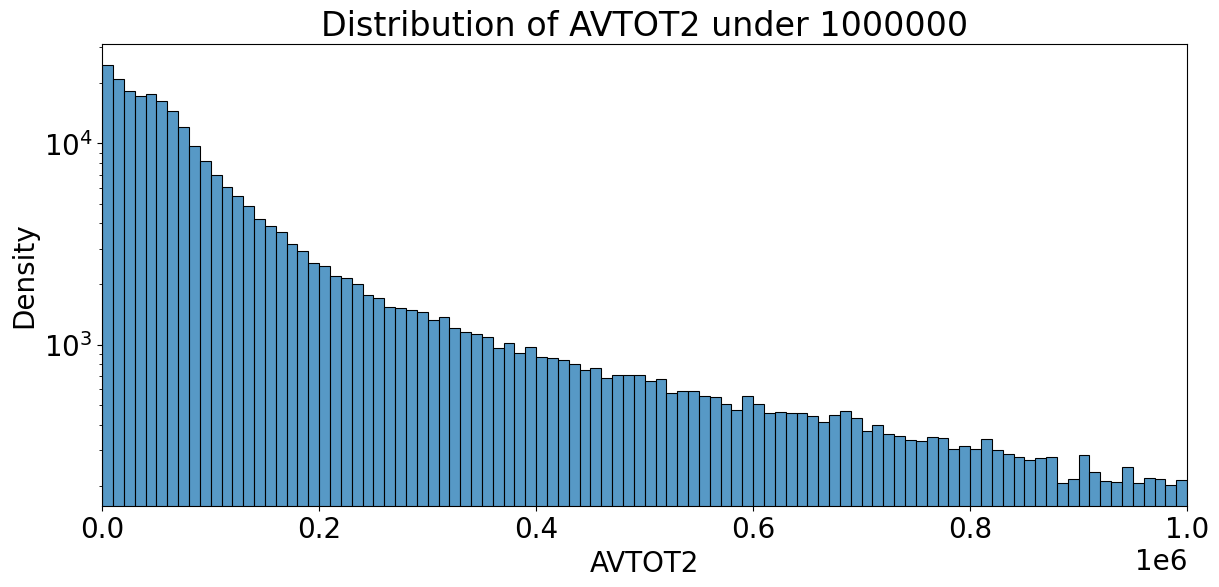

In [242]:
xhigh = 1000000
plt.xlim(0, xhigh)
plt.yscale('log')
temp = data[data['AVTOT2'] <= xhigh]
sns.histplot(temp['AVTOT2'],bins = 100, kde = False)

plt.xlabel('AVTOT2')
plt.ylabel('Density')
plt.title('Distribution of AVTOT2 under 1000000')
plt.savefig('AVTOT2')
plt.show()

## EXLAND2

In [147]:
len(data['EXLAND2'].unique())

22196

In [148]:
data['EXLAND2'].count() * 100 / numrecords

8.165218479281863

In [149]:
data['EXLAND2'].value_counts()

EXLAND2
2090.00     26393
4180.00       734
2650.00       393
62.00         387
62640.00      193
            ...  
22717.00        1
14833.00        1
16349.00        1
35819.00        1
37857.00        1
Name: count, Length: 22195, dtype: int64

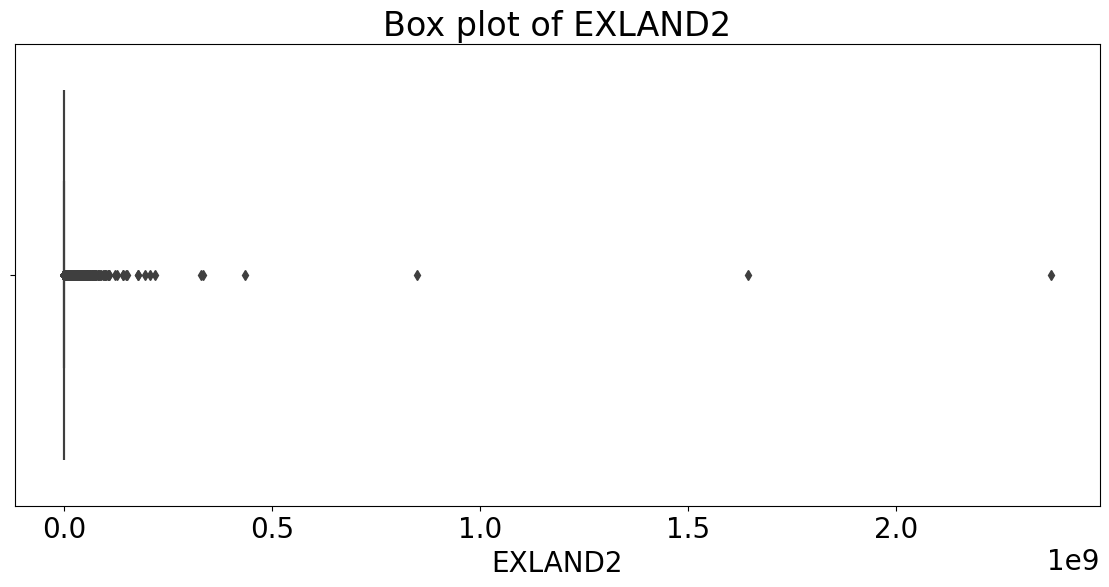

In [150]:
sns.boxplot(x = 'EXLAND2', data = data)

plt.xlabel('EXLAND2')
plt.title('Box plot of EXLAND2')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


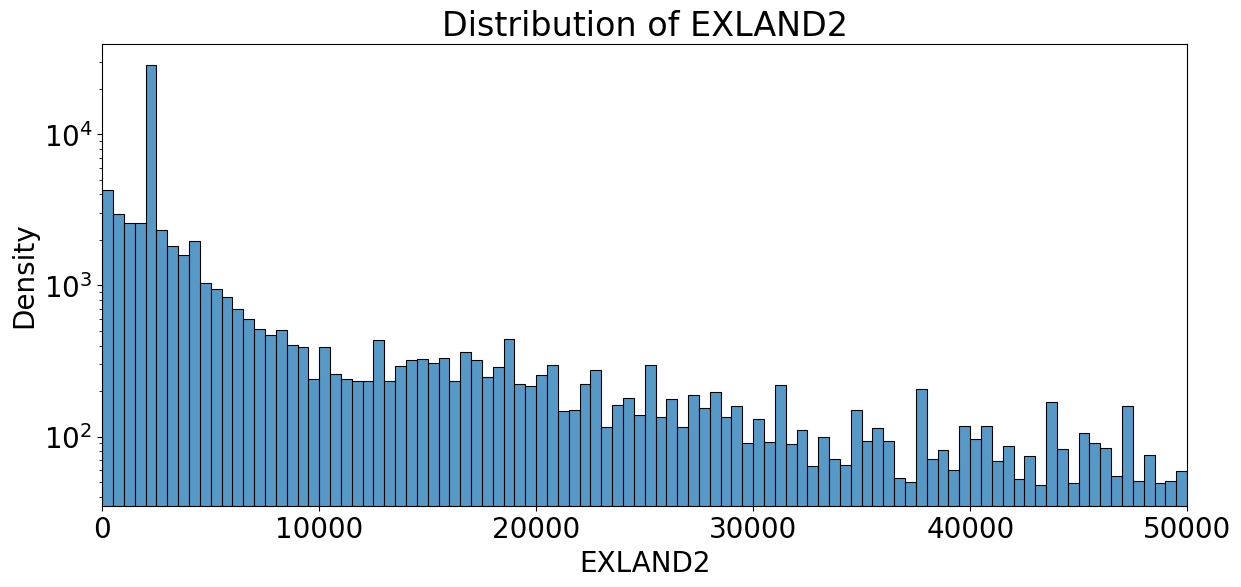

In [151]:
xhigh = 50000
plt.xlim(0, xhigh)
temp = data[data['EXLAND2'] <= xhigh]
sns.histplot(temp['EXLAND2'],bins = 100, kde = False)
plt.yscale('log')

plt.xlabel('EXLAND2')
plt.ylabel('Density')
plt.title('Distribution of EXLAND2')
plt.savefig('EXLAND2')

plt.show()

## EXTOT2

In [152]:
len(data['EXTOT2'].unique())

48349

In [153]:
data['EXTOT2'].count() * 100 / numrecords

12.215567967701032

In [154]:
data['EXTOT2'].value_counts()

EXTOT2
2090.00       24739
4180.00         911
2650.00         438
62.00           382
2850.00         375
              ...  
95737.00          1
1809630.00        1
776350.00         1
276102.00         1
394146.00         1
Name: count, Length: 48348, dtype: int64

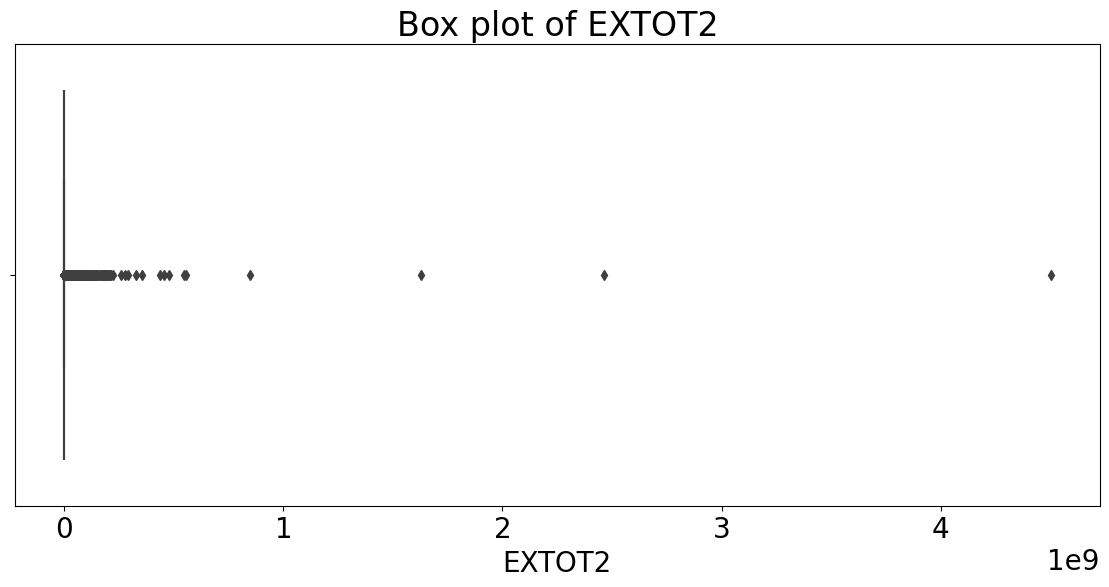

In [155]:
sns.boxplot(x = 'EXTOT2', data = data)

plt.xlabel('EXTOT2')
plt.title('Box plot of EXTOT2')

plt.show()

/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


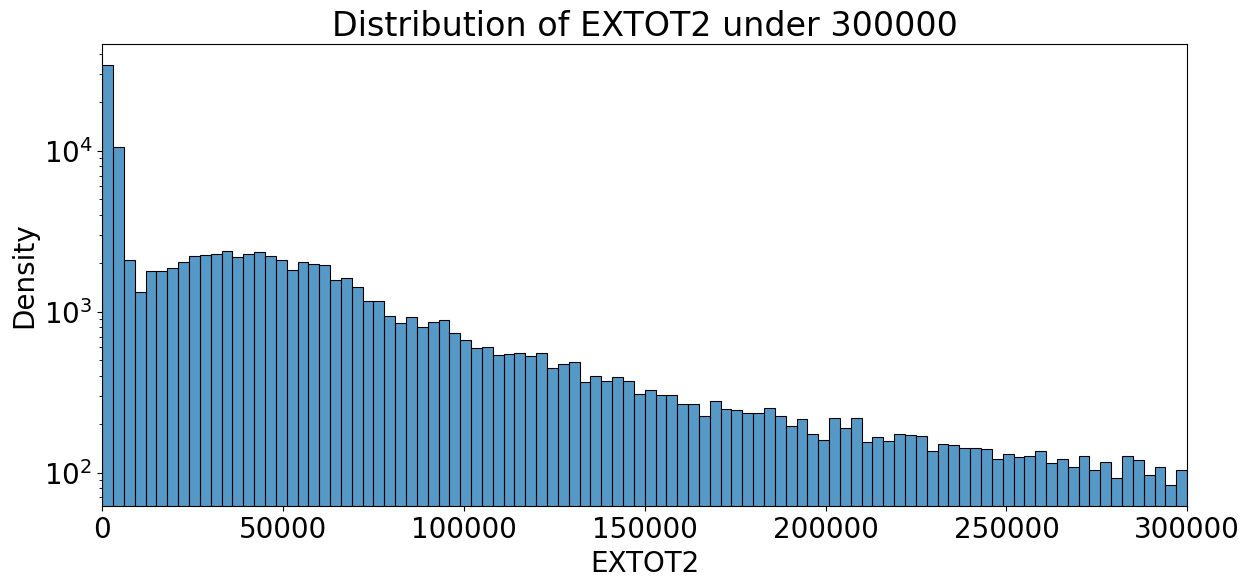

In [243]:
xhigh = 300000
plt.xlim(0, xhigh)
temp = data[data['EXTOT2'] <= xhigh]
sns.histplot(temp['EXTOT2'],bins = 100, kde = False)
plt.yscale('log')

plt.xlabel('EXTOT2')
plt.ylabel('Density')
plt.title('Distribution of EXTOT2 under 300000')
plt.savefig('EXTOT2')
plt.show()

## EXCD2

In [157]:
len(data['EXCD2'].unique())

61

In [158]:
data['EXCD2'].count() * 100 / numrecords

8.678666733893934

In [159]:
data['EXCD2'].value_counts()

EXCD2
1017.00    65777
1015.00    12337
5112.00     6867
1019.00     3178
1920.00     2961
1200.00      881
1101.00      494
5129.00      227
1986.00       35
1022.00       31
1985.00       21
1604.00       13
5109.00       11
1021.00        8
7160.00        7
1523.00        7
2280.00        7
5111.00        6
5114.00        6
2310.00        6
5113.00        6
2152.00        4
5110.00        3
1501.00        3
1023.00        3
5130.00        3
3390.00        3
1504.00        3
1605.00        2
2500.00        2
1602.00        2
1404.00        2
1603.00        2
1521.00        2
5104.00        2
1850.00        2
2232.00        1
2350.00        1
1011.00        1
2134.00        1
4500.00        1
1402.00        1
2262.00        1
5101.00        1
1930.00        1
3410.00        1
1891.00        1
1102.00        1
2202.00        1
2201.00        1
1522.00        1
2231.00        1
2132.00        1
2151.00        1
5116.00        1
6800.00        1
1505.00        1
1401.00        1
5108.00 

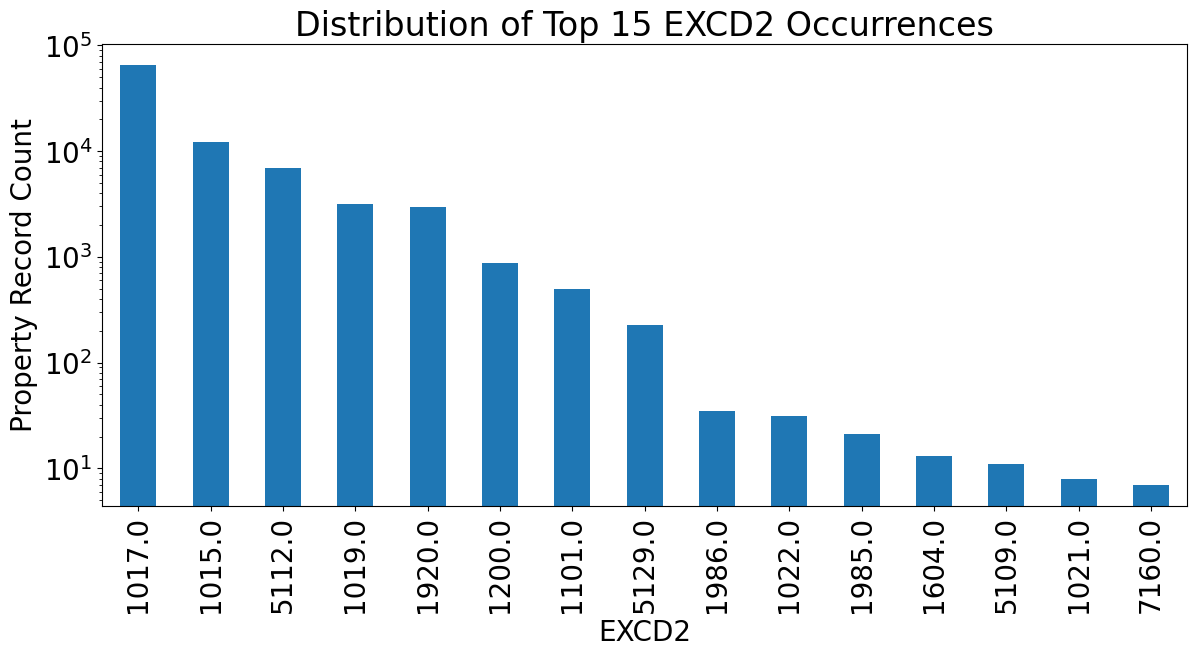

In [247]:
data['EXCD2'].value_counts().head(15).plot(kind = 'bar')
# plt.xticks(rotation = 0)
plt.yscale('log')

plt.xlabel('EXCD2')
plt.ylabel('Property Record Count')
plt.title('Distribution of Top 15 EXCD2 Occurrences')

plt.savefig('plot')

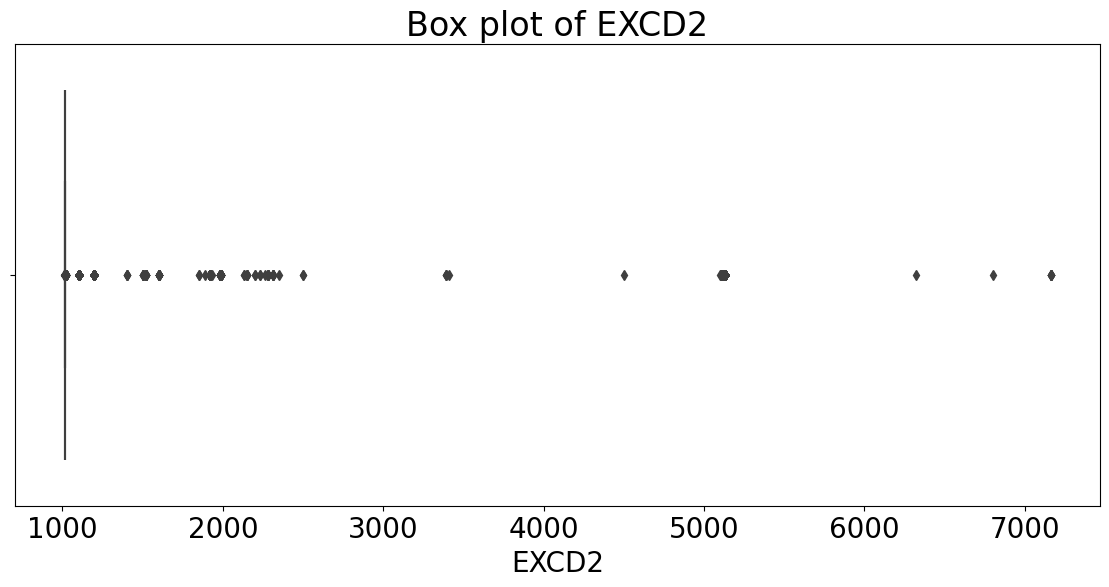

In [161]:
sns.boxplot(x = 'EXCD2', data = data)

plt.xlabel('EXCD2')
plt.title('Box plot of EXCD2')

plt.show()

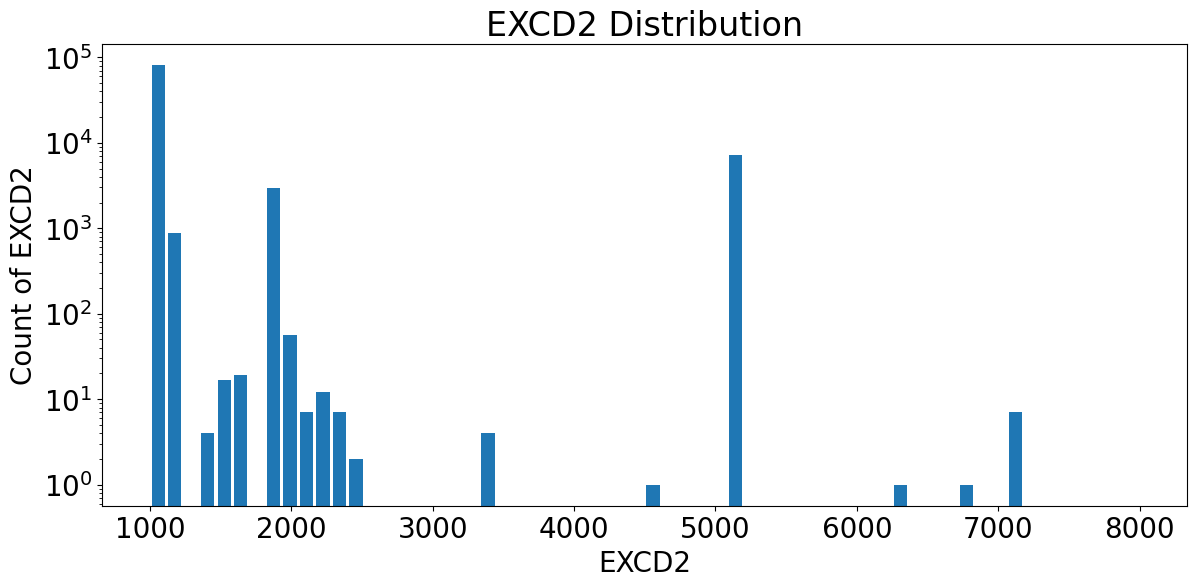

In [246]:
# plotting a histogram
range = (1000, 8000)
bins = 60

plt.hist(data['EXCD2'], bins, range, histtype = 'bar', rwidth = 0.8)

plt.yscale('log')
plt.xlabel('EXCD2')
plt.ylabel('Count of EXCD2')
plt.title('EXCD2 Distribution')
plt.savefig('EXCD2')

plt.savefig('plot')


## PERIOD

In [163]:
len(data['PERIOD'].unique())

1

In [164]:
data['PERIOD'].count() * 100 / numrecords

100.0

In [248]:
data['PERIOD']

0          FINAL
1          FINAL
2          FINAL
3          FINAL
4          FINAL
           ...  
1070989    FINAL
1070990    FINAL
1070991    FINAL
1070992    FINAL
1070993    FINAL
Name: PERIOD, Length: 1070994, dtype: object

In [165]:
data['PERIOD'].value_counts()

PERIOD
FINAL    1070994
Name: count, dtype: int64

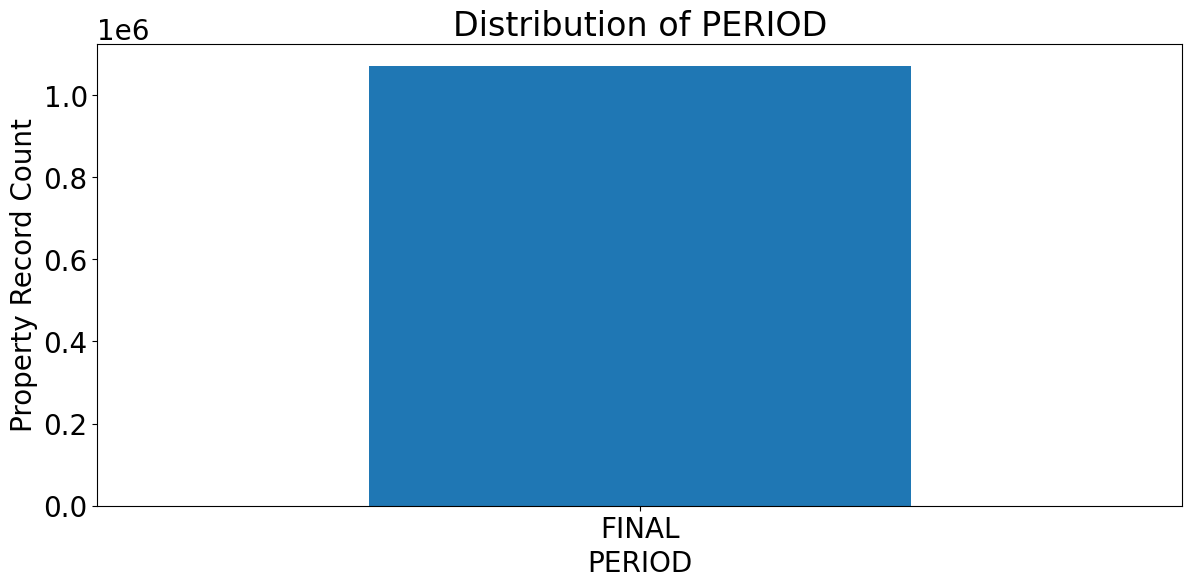

In [253]:
data['PERIOD'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
# plt.yscale('log')

plt.xlabel('PERIOD')
plt.ylabel('Property Record Count')
plt.title('Distribution of PERIOD')

plt.savefig('plot')

## YEAR

In [167]:
len(data['YEAR'].unique())

1

In [168]:
data['YEAR'].count() * 100 / numrecords

100.0

In [169]:
data['YEAR'].value_counts()

YEAR
2010/11    1070994
Name: count, dtype: int64

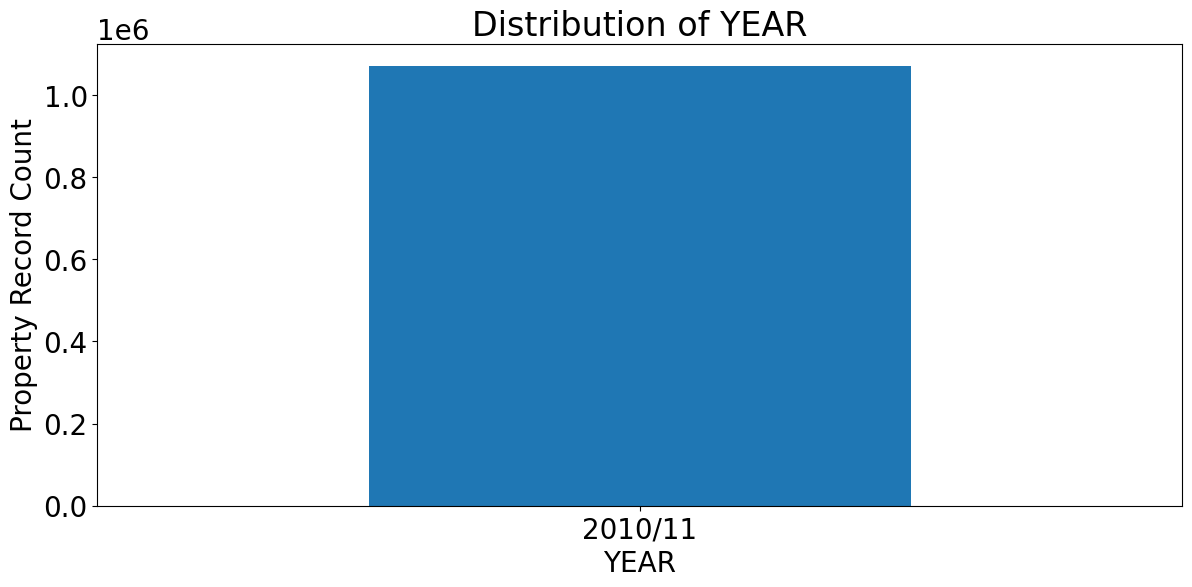

In [252]:
data['YEAR'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
# plt.yscale('log')

plt.xlabel('YEAR')
plt.ylabel('Property Record Count')
plt.title('Distribution of YEAR')

plt.savefig('plot')

## VALTYPE

In [171]:
len(data['VALTYPE'].unique())

1

In [172]:
data['VALTYPE'].count() * 100 / numrecords

100.0

In [173]:
data['VALTYPE'].value_counts()

VALTYPE
AC-TR    1070994
Name: count, dtype: int64

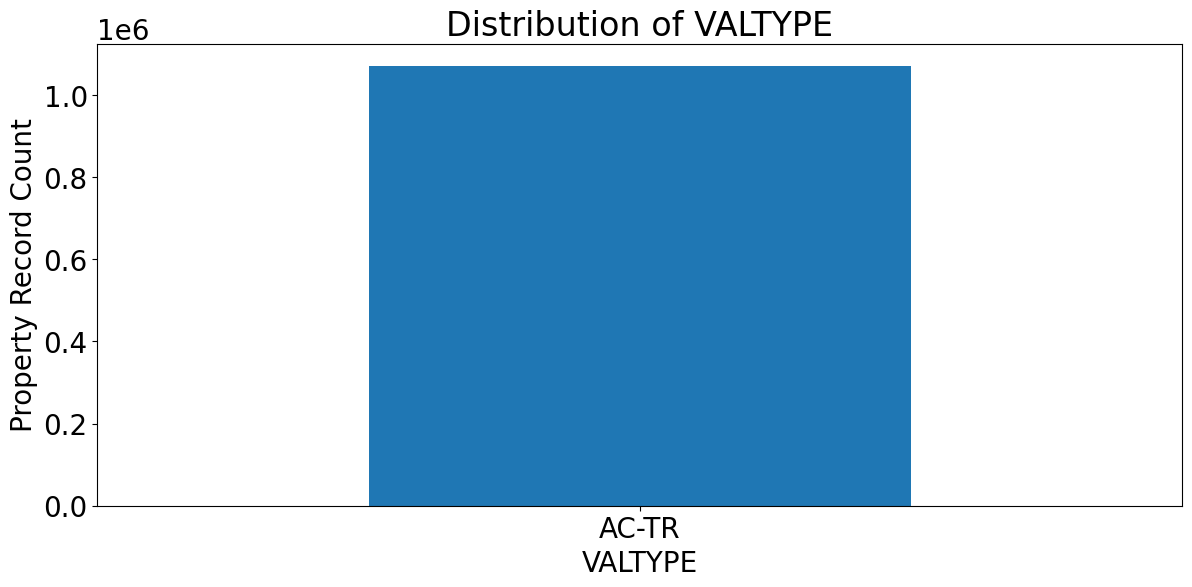

In [251]:
data['VALTYPE'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
# plt.yscale('log')

plt.xlabel('VALTYPE')
plt.ylabel('Property Record Count')
plt.title('Distribution of VALTYPE')

plt.savefig('plot')

In [175]:
print('duration: ', dt.datetime.now() - start_time)

duration:  0:00:29.680716
